# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [4]:
df1 = pd.read_csv('./data/GPP_NEE_flux_2001-2022.csv')
df2 = pd.read_csv('./data/voc_2010-2022.csv')
df3 = pd.read_csv('./data/latent_heat_flux_2018-2022.csv')
df4 = pd.read_csv('./data/latent_heat_flux_2001-2018.csv')
df5 = pd.read_csv('./data/sensible_heat_flux_2001-2022.csv')
df6 = pd.read_csv('./data/HYY_META.PAR_1997-01-01--9999-09-09.csv')
df7 = pd.read_csv('./data/HYY_META.Precipacc_2005-04-01--9999-09-09.csv')
df8 = pd.read_csv('./data/HYY_META.T672_1997-01-01--9999-09-09.csv')
df9 = pd.read_csv('./data/HYY_META.wpsoil_A_2005-06-17--9999-09-09.csv')
df10 = pd.read_csv('./data/HYY_META.wsoil_B1_p50_2007-02-01--2023-04-04.csv')

# Drop columnns 'Unnamed: 0'
df1 = df1.drop(columns=['Unnamed: 0'])
df2 = df2.drop(columns=['Unnamed: 0'])
df3 = df3.drop(columns=['Unnamed: 0'])
df4 = df4.drop(columns=['Unnamed: 0'])
df5 = df5.drop(columns=['Unnamed: 0'])
df6 = df6.drop(columns=['Unnamed: 0'])
df7 = df7.drop(columns=['Unnamed: 0'])
df8 = df8.drop(columns=['Unnamed: 0'])
df9 = df9.drop(columns=['Unnamed: 0'])
df10 = df10.drop(columns=['Unnamed: 0'])

# Convert time labels to datetime objects
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df3['Datetime'] = pd.to_datetime(df3['Datetime'])
df4['Datetime'] = pd.to_datetime(df4['Datetime'])
df5['Datetime'] = pd.to_datetime(df5['Datetime'])
df6['Datetime'] = pd.to_datetime(df6['Datetime'])
df7['Datetime'] = pd.to_datetime(df7['Datetime'])
df8['Datetime'] = pd.to_datetime(df8['Datetime'])
df9['Datetime'] = pd.to_datetime(df9['Datetime'])
df10['Datetime'] = pd.to_datetime(df10['Datetime'])

# Config parameters

In [5]:
# 1) Select the aggregation method. Allowed values are 'mean' or 'median'
# agg_method = 'mean'
agg_method = 'median'
assert agg_method in ['mean', 'median']

# 2) Select the measurement hours to consider. Allowed values are 'all', 'noon'
# daily_hours = 'all'
daily_hours = 'noon'
assert daily_hours in ['all', 'noon']

In [6]:
if daily_hours=='noon':   
    # keep only observations occurring during 10.00-14.00 each day
    df1 = df1[(df1['Datetime'].dt.hour>=10) & (df1['Datetime'].dt.hour<=14)]
    df2 = df2[(df2['Datetime'].dt.hour>=10) & (df2['Datetime'].dt.hour<=14)]
    df3 = df3[(df3['Datetime'].dt.hour>=10) & (df3['Datetime'].dt.hour<=14)]
    df4 = df4[(df4['Datetime'].dt.hour>=10) & (df4['Datetime'].dt.hour<=14)]
    df5 = df5[(df5['Datetime'].dt.hour>=10) & (df5['Datetime'].dt.hour<=14)]
    df6 = df6[(df6['Datetime'].dt.hour>=10) & (df6['Datetime'].dt.hour<=14)]
    df7 = df7[(df7['Datetime'].dt.hour>=10) & (df7['Datetime'].dt.hour<=14)]
    df8 = df8[(df8['Datetime'].dt.hour>=10) & (df8['Datetime'].dt.hour<=14)]
    df9 = df9[(df9['Datetime'].dt.hour>=10) & (df9['Datetime'].dt.hour<=14)]
    df10 = df10[(df10['Datetime'].dt.hour>=10) & (df10['Datetime'].dt.hour<=14)]

In [7]:
# Keep only the rows where NEE_gapfilling_method is 0
df1 = df1[df1.NEE_gapfilling_method == 0]

# Reset the index
df1.reset_index(drop=True, inplace=True)

In [8]:
# Aggregate to daily level
if agg_method == 'mean':
    daily_df1 = df1.resample('D', on = 'Datetime').mean().reset_index()
    daily_df2 = df2.resample('D', on = 'Datetime').mean().reset_index()
    daily_df3 = df3.resample('D', on = 'Datetime').mean().reset_index()
    daily_df4 = df4.resample('D', on = 'Datetime').mean().reset_index()
    daily_df5 = df5.resample('D', on = 'Datetime').mean().reset_index()
    daily_df6 = df6.resample('D', on = 'Datetime').mean().reset_index()
    daily_df7 = df7.resample('D', on = 'Datetime').sum().reset_index()
    daily_df8 = df8.resample('D', on = 'Datetime').mean().reset_index()
    daily_df9 = df9.resample('D', on = 'Datetime').mean().reset_index()
    daily_df10 = df10.resample('D', on = 'Datetime').mean().reset_index()
elif agg_method == 'median':
    daily_df1 = df1.resample('D', on = 'Datetime').median().reset_index()
    daily_df2 = df2.resample('D', on = 'Datetime').median().reset_index()
    daily_df3 = df3.resample('D', on = 'Datetime').median().reset_index()
    daily_df4 = df4.resample('D', on = 'Datetime').median().reset_index()
    daily_df5 = df5.resample('D', on = 'Datetime').median().reset_index()
    daily_df6 = df6.resample('D', on = 'Datetime').median().reset_index()
    daily_df7 = df7.resample('D', on = 'Datetime').sum().reset_index()
    daily_df8 = df8.resample('D', on = 'Datetime').median().reset_index()
    daily_df9 = df9.resample('D', on = 'Datetime').median().reset_index()
    daily_df10 = df10.resample('D', on = 'Datetime').median().reset_index()
else:
    raise ValueError('agg_method must be either "mean" or "median"')

# Create dataframe

In [9]:
ddf1 = daily_df1[daily_df1['Datetime'].dt.year >= 2010]
ddf1.head()

ddf2 = daily_df2[daily_df2['Datetime'].dt.year >= 2010]
ddf2.head()

ddf3 = daily_df3[daily_df3['Datetime'].dt.year >= 2010]
ddf3.head()

ddf4 = daily_df4[daily_df4['Datetime'].dt.year >= 2010]
ddf4.head()

ddf6 = daily_df6[daily_df6['Datetime'].dt.year >= 2010]
ddf6.head()

ddf7 = daily_df7[daily_df7['Datetime'].dt.year >= 2010]
ddf7.head()

ddf8 = daily_df8[daily_df8['Datetime'].dt.year >= 2010]
ddf8.head()

ddf9 = daily_df9[daily_df9['Datetime'].dt.year >= 2010]
ddf9.head()

ddf10 = daily_df10[daily_df10['Datetime'].dt.year >= 2010]
ddf10.head()

ddf4 = ddf4.rename(columns={'HYY_EDDY233.LE': 'lh_flux'})
ddf4 = ddf4.drop(columns=['HYY_EDDY233.Qc_LE'])

ddf3 = ddf3.rename(columns={'latent_heat_flux_after_4-2018': 'lh_flux'})
ddf3 = ddf3.drop(columns=['latent_heat_flux_quality_flag_after_4-2018'])
lh_df = pd.concat([ddf4, ddf3], ignore_index=True)

lh_df = lh_df[lh_df['Datetime'].dt.year >= 2010]
lh_df.head()

daily_df5.head()
#drop rows where datetime is before 2010-05-29
ddf5 = daily_df5[daily_df5['Datetime'].dt.year >= 2010]
ddf5.head()

#full_df = pd.concat([ddf1['Datetime'], ddf1['NEE']])
#full_df.head()
ddf1 = ddf1.drop(columns=['NEE_gapfilling_method', 'GPP'])
ddf5 = ddf5.drop(columns=['sensible_heat_flux_gapfilling_method'])

ddf = pd.merge(ddf1, ddf2, on='Datetime', how='inner')
ddf = pd.merge(ddf, lh_df, on='Datetime', how='inner')
ddf = pd.merge(ddf, ddf5, on='Datetime', how='inner')
ddf = pd.merge(ddf, ddf6, on='Datetime', how='inner')
ddf = pd.merge(ddf, ddf7, on='Datetime', how='inner')
ddf = pd.merge(ddf, ddf8, on='Datetime', how='inner')
ddf = pd.merge(ddf, ddf9, on='Datetime', how='inner')
ddf = pd.merge(ddf, ddf10, on='Datetime', how='inner')
ddf.head()


,Datetime,NEE,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux,lh_flux,sensible_heat_flux,HYY_META.PAR,HYY_META.Precipacc,HYY_META.T672,HYY_META.wpsoil_A,HYY_META.wsoil_B1_p50
0,2010-05-29,-10.0310,10.613590,16.89274,7.57044,2.652575,54.65915,42.8565,464.080,1.78,8.070,11.7785,0.283860
1,2010-05-30,-11.4725,38.513825,34.04258,1.72830,3.922185,165.80755,174.5570,737.515,0.00,10.215,11.8135,0.283745
2,2010-05-31,-10.5330,54.609810,29.41079,5.05139,2.909770,194.49385,257.2225,1471.450,0.00,14.660,11.7560,0.278445
3,2010-06-01,-9.4610,44.327820,44.19043,17.50203,NaN,170.20680,316.2715,1475.490,0.00,15.445,11.6470,0.274990
4,2010-06-02,-8.9000,NaN,NaN,NaN,NaN,177.06070,365.3675,1503.465,0.00,18.390,11.4500,0.271490


In [10]:
# set the window size
WINDOW_SIZE = 3

# Dictionary to help selecting data and labeling the plots
months = {1: 'January', 
          2: 'February', 
          3: 'March', 
          4: 'April', 
          5: 'May', 
          6: 'June', 
          7: 'July', 
          8: 'August', 
          9: 'September', 
          10: 'October', 
          11: 'November', 
          12: 'December'}

# select the months of interest
start_month = 1
end_month = 12

In [11]:
metric = 'median'
#metric = 'mean'

# Filter data for start_month and end_month
daily_df_med = ddf[(ddf['Datetime'].dt.month >= start_month) 
                            & (ddf['Datetime'].dt.month <= end_month)].copy()

if metric == 'median':
    daily_df_med['monoterp_rm'] = daily_df_med['monoterpene_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    # daily_df_med['methanol_rm'] = daily_df_med['methanol_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    # daily_df_med['acetone_rm'] = daily_df_med['acetone_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    # daily_df_med['acetaldehyde_rm'] = daily_df_med['acetaldehyde_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    daily_df_med['sensible_heat_rm'] = daily_df_med['sensible_heat_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    daily_df_med['latent_heat_rm'] = daily_df_med['lh_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    daily_df_med['nee_rm'] = daily_df_med['NEE'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    daily_df_med['PAR_rm'] = daily_df_med['HYY_META.PAR'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    daily_df_med['precip_rm'] = daily_df_med['HYY_META.Precipacc'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    daily_df_med['t672_rm'] = daily_df_med['HYY_META.T672'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    daily_df_med['wpsoil_A_rm'] = daily_df_med['HYY_META.wpsoil_A'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
    daily_df_med['wsoil_B1_p50_rm'] = daily_df_med['HYY_META.wsoil_B1_p50'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).median()
elif metric == 'mean':
    daily_df_med['monoterp_rm'] = daily_df_med['monoterpene_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    # daily_df_med['methanol_rm'] = daily_df_med['methanol_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    # daily_df_med['acetone_rm'] = daily_df_med['acetone_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    # daily_df_med['acetaldehyde_rm'] = daily_df_med['acetaldehyde_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    daily_df_med['sensible_heat_rm'] = daily_df_med['sensible_heat_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    daily_df_med['latent_heat_rm'] = daily_df_med['lh_flux'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    daily_df_med['nee_rm'] = daily_df_med['NEE'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    daily_df_med['PAR_rm'] = daily_df_med['HYY_META.PAR'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    daily_df_med['precip_rm'] = daily_df_med['HYY_META.Precipacc'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    daily_df_med['t672_rm'] = daily_df_med['HYY_META.T672'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    daily_df_med['wpsoil_A_rm'] = daily_df_med['HYY_META.wpsoil_A'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()
    daily_df_med['wsoil_B1_p50_rm'] = daily_df_med['HYY_META.wsoil_B1_p50'].rolling(window=WINDOW_SIZE, min_periods=1, axis=0, center=True).mean()

# Add a column for the day of year
daily_df_med['day'] = daily_df_med['Datetime'].dt.dayofyear

# Add a column for the year
daily_df_med['year'] = daily_df_med['Datetime'].dt.year

# Pivot the DataFrame so that rows are days and columns are years
df_mono = daily_df_med.pivot(index='day', columns='year', values='monoterp_rm')
df_sensible = daily_df_med.pivot(index='day', columns='year', values='sensible_heat_rm')
df_latent = daily_df_med.pivot(index='day', columns='year', values='latent_heat_rm')
df_nee = daily_df_med.pivot(index='day', columns='year', values='nee_rm')
df_PAR = daily_df_med.pivot(index='day', columns='year', values='PAR_rm')
df_precip = daily_df_med.pivot(index='day', columns='year', values='precip_rm')
df_t672 = daily_df_med.pivot(index='day', columns='year', values='t672_rm')
df_wpsoil_A = daily_df_med.pivot(index='day', columns='year', values='wpsoil_A_rm')
df_wsoil_B1_p50 = daily_df_med.pivot(index='day', columns='year', values='wsoil_B1_p50_rm')

daily_df_med.drop(columns=[
    'NEE',
    'monoterpene_flux',
    'methanol_flux',
    'acetone_flux',
    'acetaldehyde_flux',
    'sensible_heat_flux',
    'lh_flux','HYY_META.PAR',
    'HYY_META.Precipacc',
    'HYY_META.T672',
    'HYY_META.wpsoil_A',
    'HYY_META.wsoil_B1_p50'], inplace=True)

# create dataframe with day of year as column and 0.1 and 0.9 quantiles as rows
mono_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_mono.index) + 1))
sensible_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_sensible.index) + 1))
latent_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_latent.index) + 1))
nee_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_nee.index) + 1))
PAR_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_PAR.index) + 1))
precip_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_precip.index) + 1))
t672_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_t672.index) + 1))
wpsoil_A_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_wpsoil_A.index) + 1))
wsoil_B1_p50_quant = pd.DataFrame(index=[0.1, 0.9], columns=range(1, len(df_wsoil_B1_p50.index) + 1))

def create_arrays(row_index, dataframe):
    current_row = dataframe.iloc[row_index].to_numpy()
    
    start_index = max(1, row_index - 7)
    end_index = min(row_index + 6, len(dataframe)-1)
    
    previous_rows = dataframe.iloc[start_index:row_index].to_numpy()
    next_rows = dataframe.iloc[row_index + 1:end_index + 1].to_numpy()
    
    # Concatenate arrays
    result_array = np.concatenate([previous_rows.flatten(), current_row, next_rows.flatten()])
    
    return result_array

# quantiles for each variable calculated from same day each year +- one week

for index, row in df_mono.iterrows():
    if index == len(df_mono):
        break
    array = create_arrays(index, df_mono)
    lquant = np.nanquantile(array, 0.1)
    mono_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    mono_quant.at[0.9, index] = uquant

for index, row in df_sensible.iterrows():
    if index == len(df_sensible):
        break
    array = create_arrays(index, df_sensible)
    lquant = np.nanquantile(array, 0.1)
    sensible_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    sensible_quant.at[0.9, index] = uquant

for index, row in df_latent.iterrows():
    if index == len(df_latent):
        break
    array = create_arrays(index, df_latent)
    lquant = np.nanquantile(array, 0.1)
    latent_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    latent_quant.at[0.9, index] = uquant

for index, row in df_nee.iterrows():
    if index == len(df_nee):
        break
    array = create_arrays(index, df_nee)
    lquant = np.nanquantile(array, 0.1)
    nee_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    nee_quant.at[0.9, index] = uquant

for index, row in df_PAR.iterrows():
    if index == len(df_PAR):
        break
    array = create_arrays(index, df_PAR)
    lquant = np.nanquantile(array, 0.1)
    PAR_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    PAR_quant.at[0.9, index] = uquant

for index, row in df_precip.iterrows():
    if index == len(df_precip):
        break
    array = create_arrays(index, df_precip)
    lquant = np.nanquantile(array, 0.1)
    precip_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    precip_quant.at[0.9, index] = uquant

for index, row in df_t672.iterrows():
    if index == len(df_t672):
        break
    array = create_arrays(index, df_t672)
    lquant = np.nanquantile(array, 0.1)
    t672_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    t672_quant.at[0.9, index] = uquant

for index, row in df_wpsoil_A.iterrows():
    if index == len(df_wpsoil_A):
        break
    array = create_arrays(index, df_wpsoil_A)
    lquant = np.nanquantile(array, 0.1)
    wpsoil_A_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    wpsoil_A_quant.at[0.9, index] = uquant

for index, row in df_wsoil_B1_p50.iterrows():
    if index == len(df_wsoil_B1_p50):
        break
    array = create_arrays(index, df_wsoil_B1_p50)
    lquant = np.nanquantile(array, 0.1)
    wsoil_B1_p50_quant.at[0.1, index] = lquant
    uquant = np.nanquantile(array, 0.9)
    wsoil_B1_p50_quant.at[0.9, index] = uquant


# quantiles for each variable calculated from same day each year
    
# mono_quant = df_mono.quantile([0.1, 0.9], axis=1, numeric_only=True)
# sensible_quant = df_sensible.quantile([0.1, 0.9], axis=1, numeric_only=True)
# latent_quant = df_latent.quantile([0.1, 0.9], axis=1, numeric_only=True)
# nee_quant = df_nee.quantile([0.1, 0.9], axis=1, numeric_only=True)


In [12]:

daily_df_med.set_index('Datetime', inplace=True)

# calculate outliers
for index, row in daily_df_med.iterrows():
    day = index.dayofyear

    daily_df_med.at[index, 'monoterp_zscore']=(row['monoterp_rm']-df_mono.loc[day].mean())/df_mono.loc[day].std(ddof=0)
    
    daily_df_med.at[index, 'sensible_heat_zscore']=(row['sensible_heat_rm']-df_sensible.loc[day].mean())/df_sensible.loc[day].std(ddof=0)
    
    daily_df_med.at[index, 'latent_heat_zscore']=(row['latent_heat_rm']-df_latent.loc[day].mean())/df_latent.loc[day].std(ddof=0)
    
    daily_df_med.at[index, 'nee_zscore']=(row['nee_rm']-df_nee.loc[day].mean())/df_nee.loc[day].std(ddof=0)
    
    daily_df_med.at[index, 'PAR_zscore']=(row['PAR_rm']-df_PAR.loc[day].mean())/df_PAR.loc[day].std(ddof=0)
    
    daily_df_med.at[index, 'precip_zscore']=(row['precip_rm']-df_precip.loc[day].mean())/df_precip.loc[day].std(ddof=0)
    
    daily_df_med.at[index, 't672_zscore']=(row['t672_rm']-df_t672.loc[day].mean())/df_t672.loc[day].std(ddof=0)

    daily_df_med.at[index, 'wpsoil_A_zscore']=(row['wpsoil_A_rm']-df_wpsoil_A.loc[day].mean())/df_wpsoil_A.loc[day].std(ddof=0)

    daily_df_med.at[index, 'wsoil_B1_p50_zscore']=(row['wsoil_B1_p50_rm']-df_wsoil_B1_p50.loc[day].mean())/df_wsoil_B1_p50.loc[day].std(ddof=0)
    
    if row['monoterp_rm'] < mono_quant[day][0.1] or row['monoterp_rm'] > mono_quant[day][0.9]:
        daily_df_med.at[index, 'monoterp_outlier'] = 1
    else:
        daily_df_med.at[index, 'monoterp_outlier'] = 0

    if row['sensible_heat_rm'] < sensible_quant[day][0.1] or row['sensible_heat_rm'] > sensible_quant[day][0.9]:
        daily_df_med.at[index, 'sensible_heat_outlier'] = 1
    else:
        daily_df_med.at[index, 'sensible_heat_outlier'] = 0

    if row['latent_heat_rm'] < latent_quant[day][0.1] or row['latent_heat_rm'] > latent_quant[day][0.9]:
        daily_df_med.at[index, 'latent_heat_outlier'] = 1
    else:
        daily_df_med.at[index, 'latent_heat_outlier'] = 0

    if row['nee_rm'] < nee_quant[day][0.1] or row['nee_rm'] > nee_quant[day][0.9]:
        daily_df_med.at[index, 'nee_outlier'] = 1
    else:
        daily_df_med.at[index, 'nee_outlier'] = 0

    if row['PAR_rm'] < PAR_quant[day][0.1] or row['PAR_rm'] > PAR_quant[day][0.9]:
        daily_df_med.at[index, 'PAR_outlier'] = 1
    else:
        daily_df_med.at[index, 'PAR_outlier'] = 0

    if row['precip_rm'] < precip_quant[day][0.1] or row['precip_rm'] > precip_quant[day][0.9]:
        daily_df_med.at[index, 'precip_outlier'] = 1
    else:
        daily_df_med.at[index, 'precip_outlier'] = 0

    if row['t672_rm'] < t672_quant[day][0.1] or row['t672_rm'] > t672_quant[day][0.9]:
        daily_df_med.at[index, 't672_outlier'] = 1
    else:
        daily_df_med.at[index, 't672_outlier'] = 0

    if row['wpsoil_A_rm'] < wpsoil_A_quant[day][0.1] or row['wpsoil_A_rm'] > wpsoil_A_quant[day][0.9]:
        daily_df_med.at[index, 'wpsoil_A_outlier'] = 1
    else:
        daily_df_med.at[index, 'wpsoil_A_outlier'] = 0

    if row['wsoil_B1_p50_rm'] < wsoil_B1_p50_quant[day][0.1] or row['wsoil_B1_p50_rm'] > wsoil_B1_p50_quant[day][0.9]:
        daily_df_med.at[index, 'wsoil_B1_p50_outlier'] = 1
    else:
        daily_df_med.at[index, 'wsoil_B1_p50_outlier'] = 0

daily_df_med.drop(columns=[
    'monoterp_rm',
    'sensible_heat_rm',
    'latent_heat_rm',
    'nee_rm',
    'year',
    'PAR_rm',
    'precip_rm',
    't672_rm',
    'wpsoil_A_rm',
    'wsoil_B1_p50_rm'], inplace=True)

daily_df_med_2010 = daily_df_med[daily_df_med.index.year == 2010]
daily_df_med_2011 = daily_df_med[daily_df_med.index.year == 2011]
daily_df_med_2012 = daily_df_med[daily_df_med.index.year == 2012]
daily_df_med_2013 = daily_df_med[daily_df_med.index.year == 2013]
daily_df_med_2014 = daily_df_med[daily_df_med.index.year == 2014]
daily_df_med_2015 = daily_df_med[daily_df_med.index.year == 2015]
daily_df_med_2016 = daily_df_med[daily_df_med.index.year == 2016]
daily_df_med_2017 = daily_df_med[daily_df_med.index.year == 2017]
daily_df_med_2018 = daily_df_med[daily_df_med.index.year == 2018]
daily_df_med_2019 = daily_df_med[daily_df_med.index.year == 2019]
daily_df_med_2020 = daily_df_med[daily_df_med.index.year == 2020]
daily_df_med_2021 = daily_df_med[daily_df_med.index.year == 2021]
daily_df_med_2022 = daily_df_med[daily_df_med.index.year == 2022]

daily_df_med_2010.set_index('day', inplace=True)
daily_df_med_2011.set_index('day', inplace=True)
daily_df_med_2012.set_index('day', inplace=True)
daily_df_med_2013.set_index('day', inplace=True)
daily_df_med_2014.set_index('day', inplace=True)
daily_df_med_2015.set_index('day', inplace=True)
daily_df_med_2016.set_index('day', inplace=True)
daily_df_med_2017.set_index('day', inplace=True)
daily_df_med_2018.set_index('day', inplace=True)
daily_df_med_2019.set_index('day', inplace=True)
daily_df_med_2020.set_index('day', inplace=True)
daily_df_med_2021.set_index('day', inplace=True)
daily_df_med_2022.set_index('day', inplace=True)



/tmp/ipykernel_32337/3190169788.py:17: RuntimeWarning: invalid value encountered in scalar divide
  daily_df_med.at[index, 'precip_zscore']=(row['precip_rm']-df_precip.loc[day].mean())/df_precip.loc[day].std(ddof=0)


# z-scores for the 4 variables

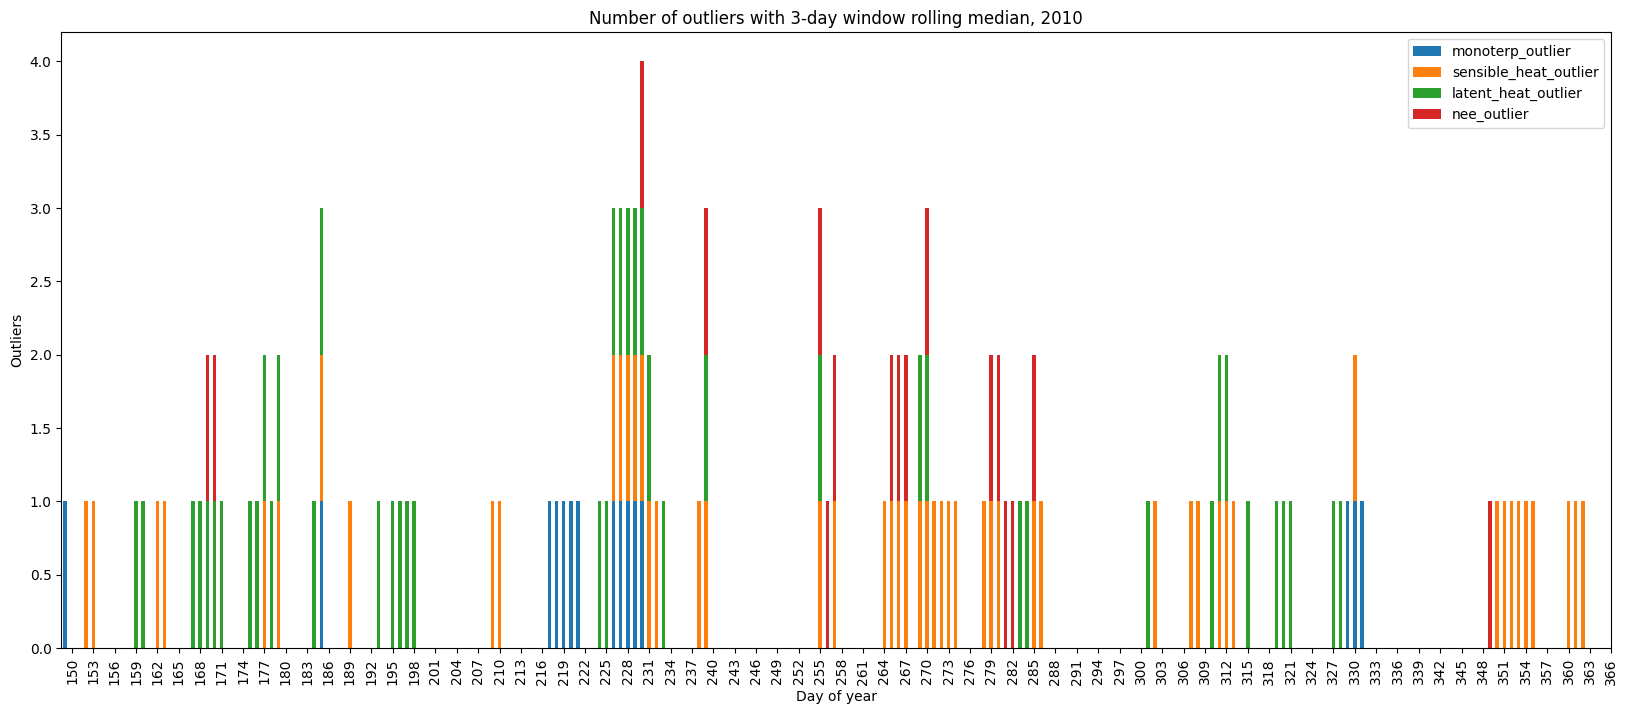

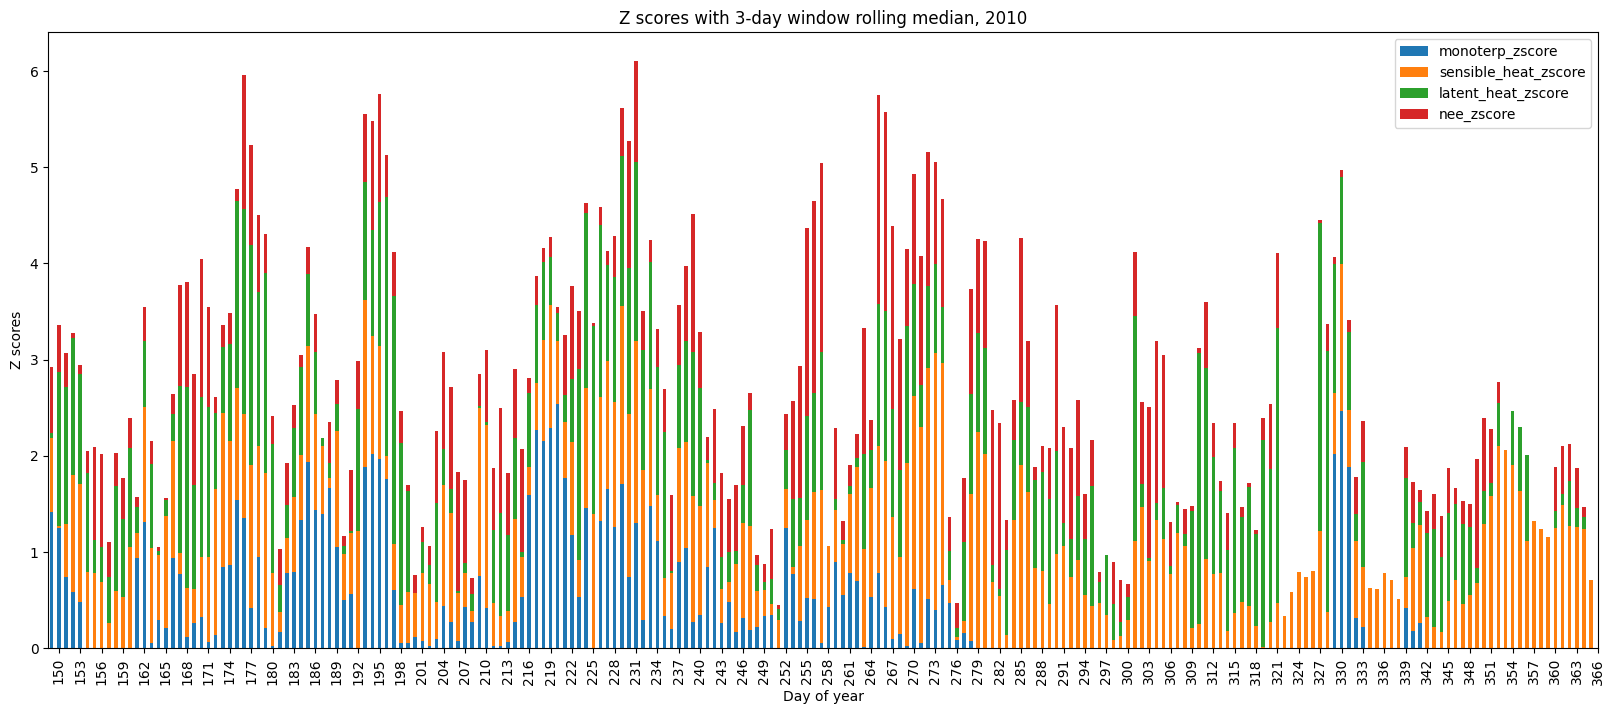

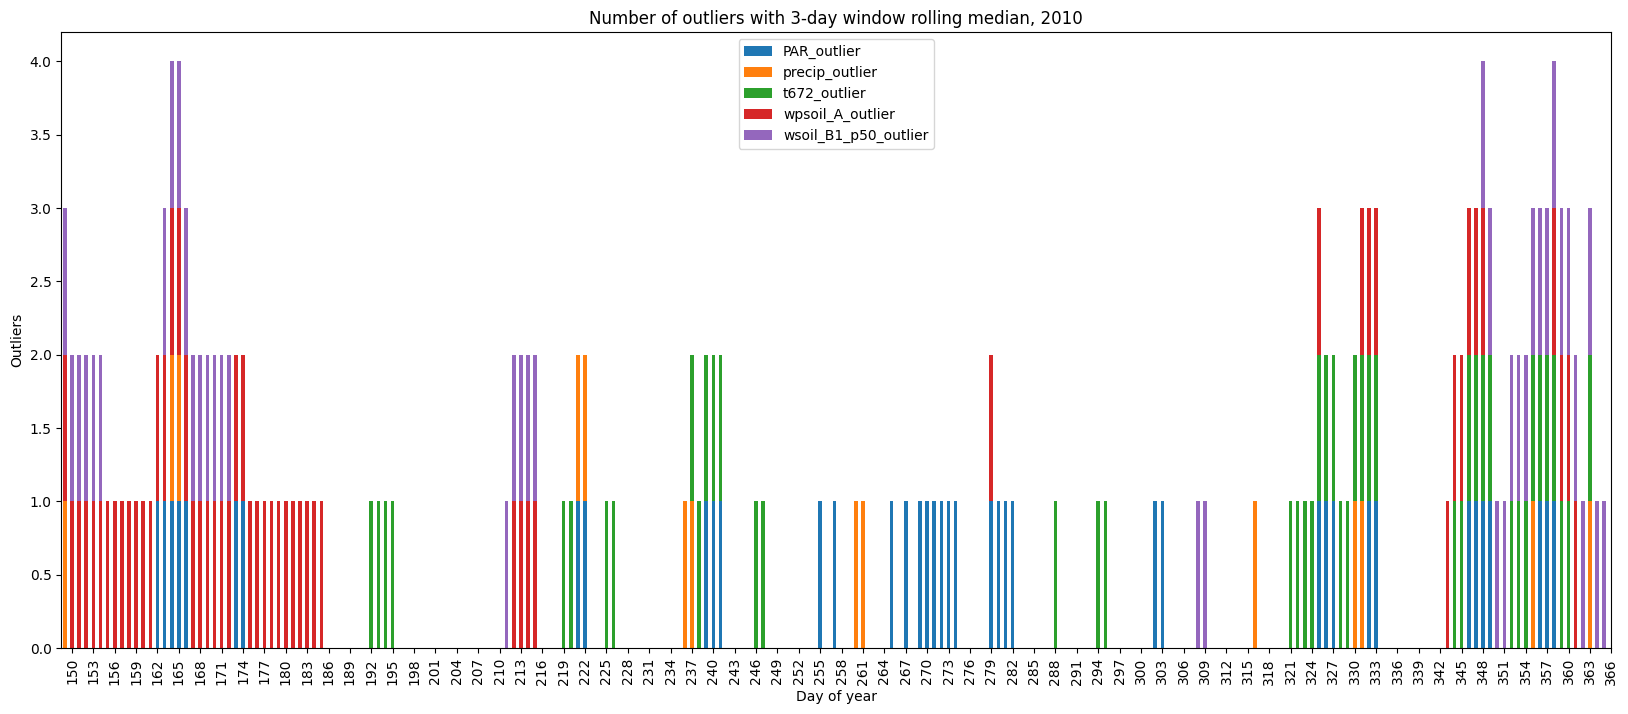

In [13]:
daily_df_med_2010.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2010.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2010.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2010')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2010.iloc[:,:4].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2010.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2010.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2010')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2010.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2010.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2010.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2010')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()

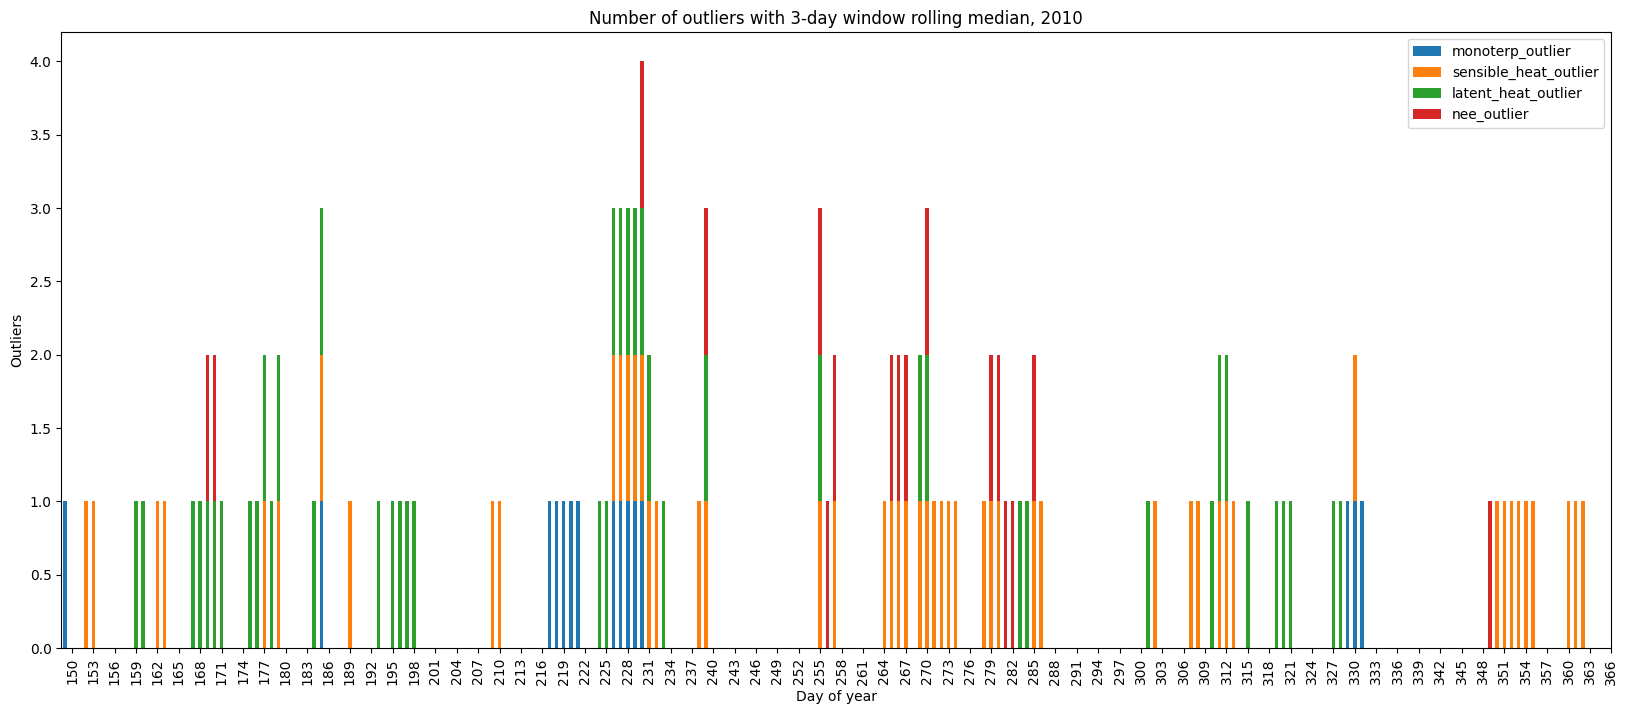

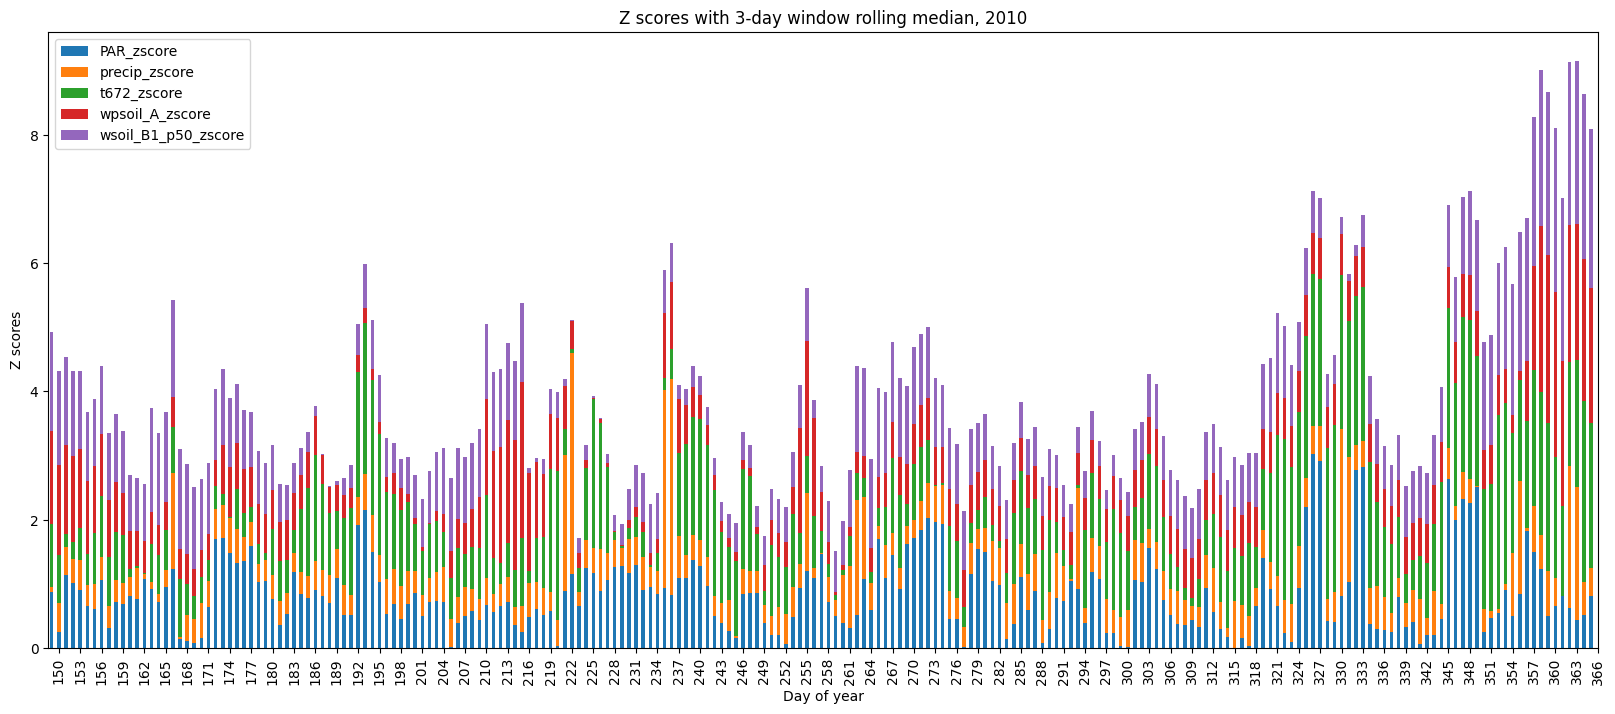

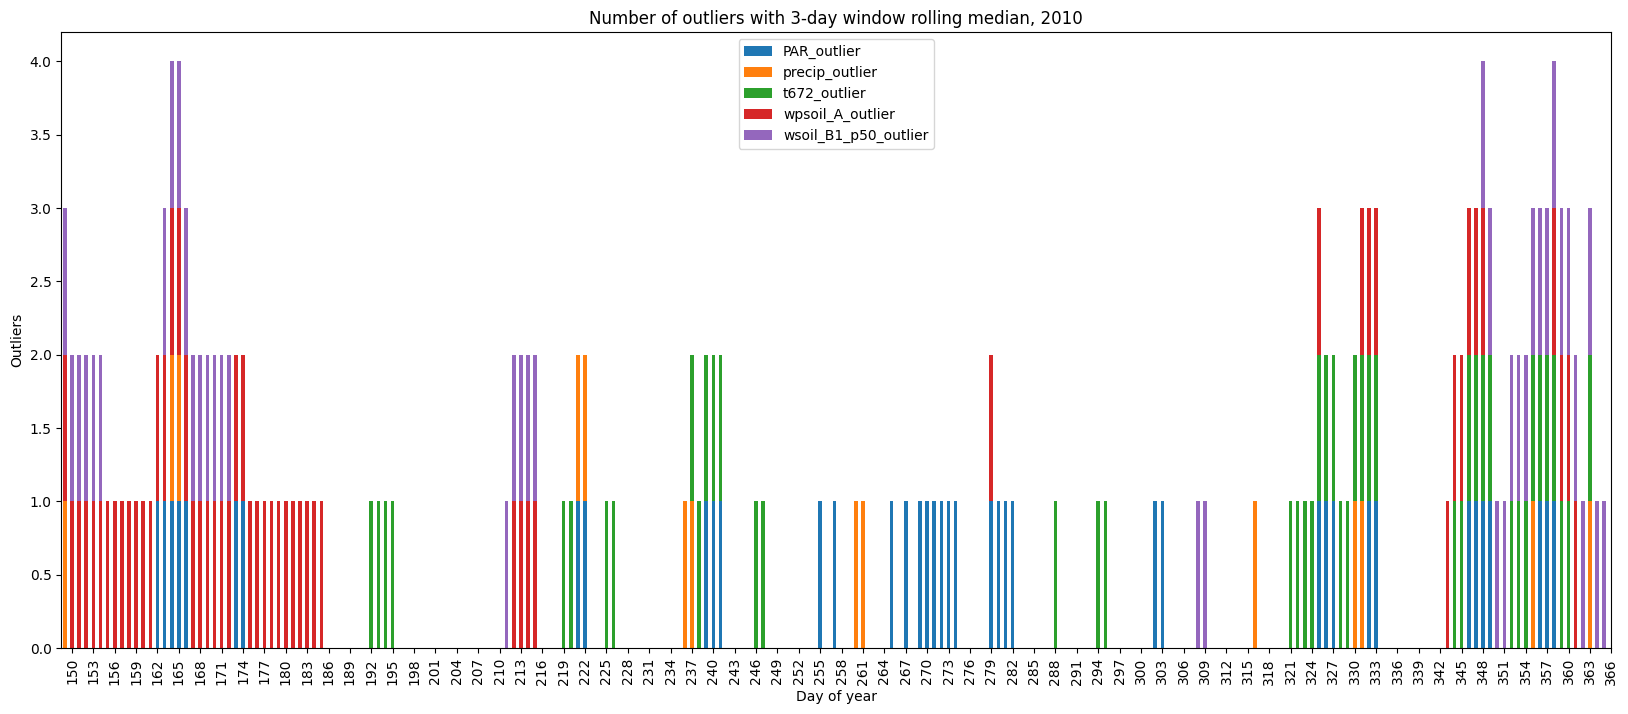

In [14]:
daily_df_med_2010.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2010.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2010.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2010')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2010.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2010.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2010.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2010')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2010.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2010.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2010.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2010')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()

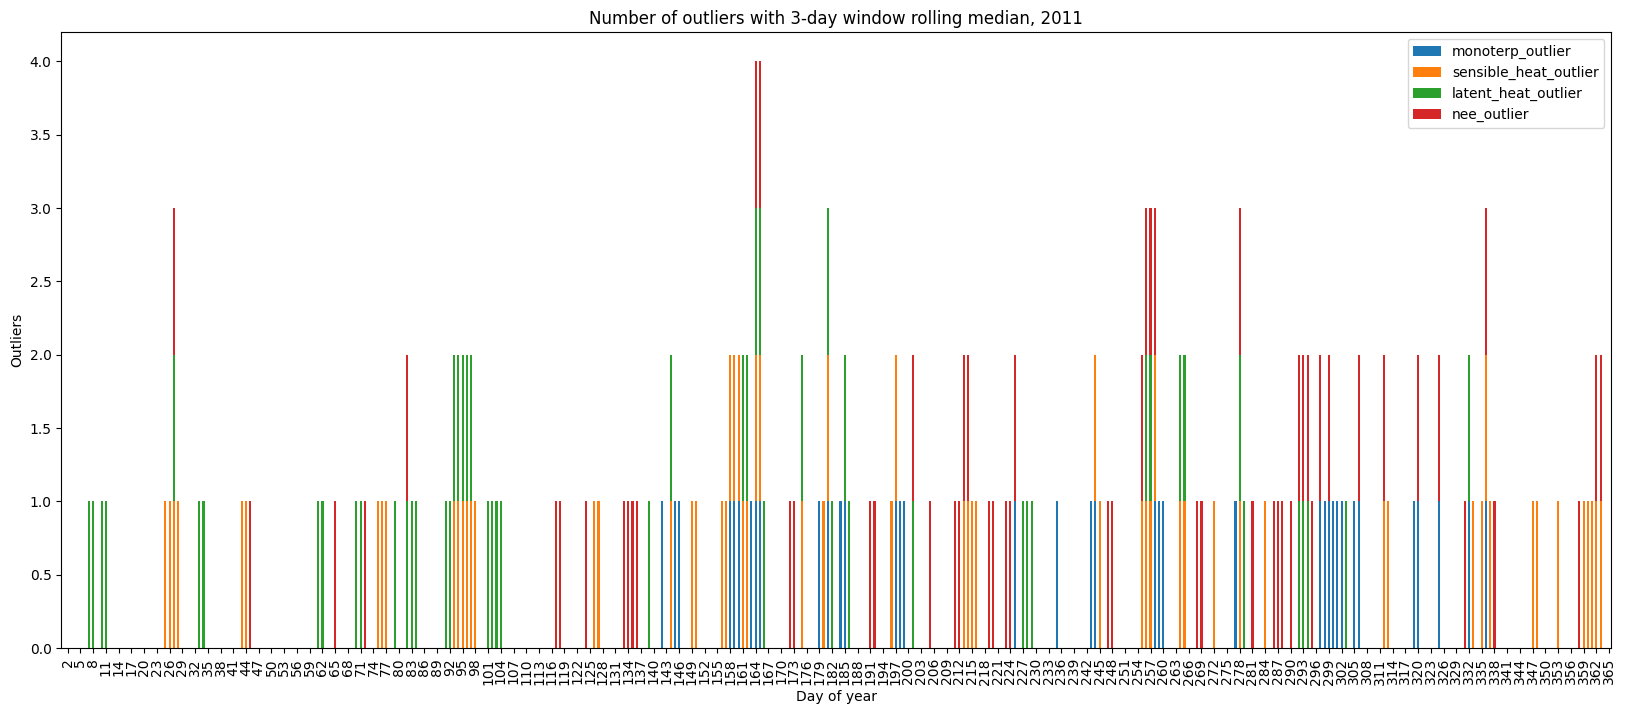

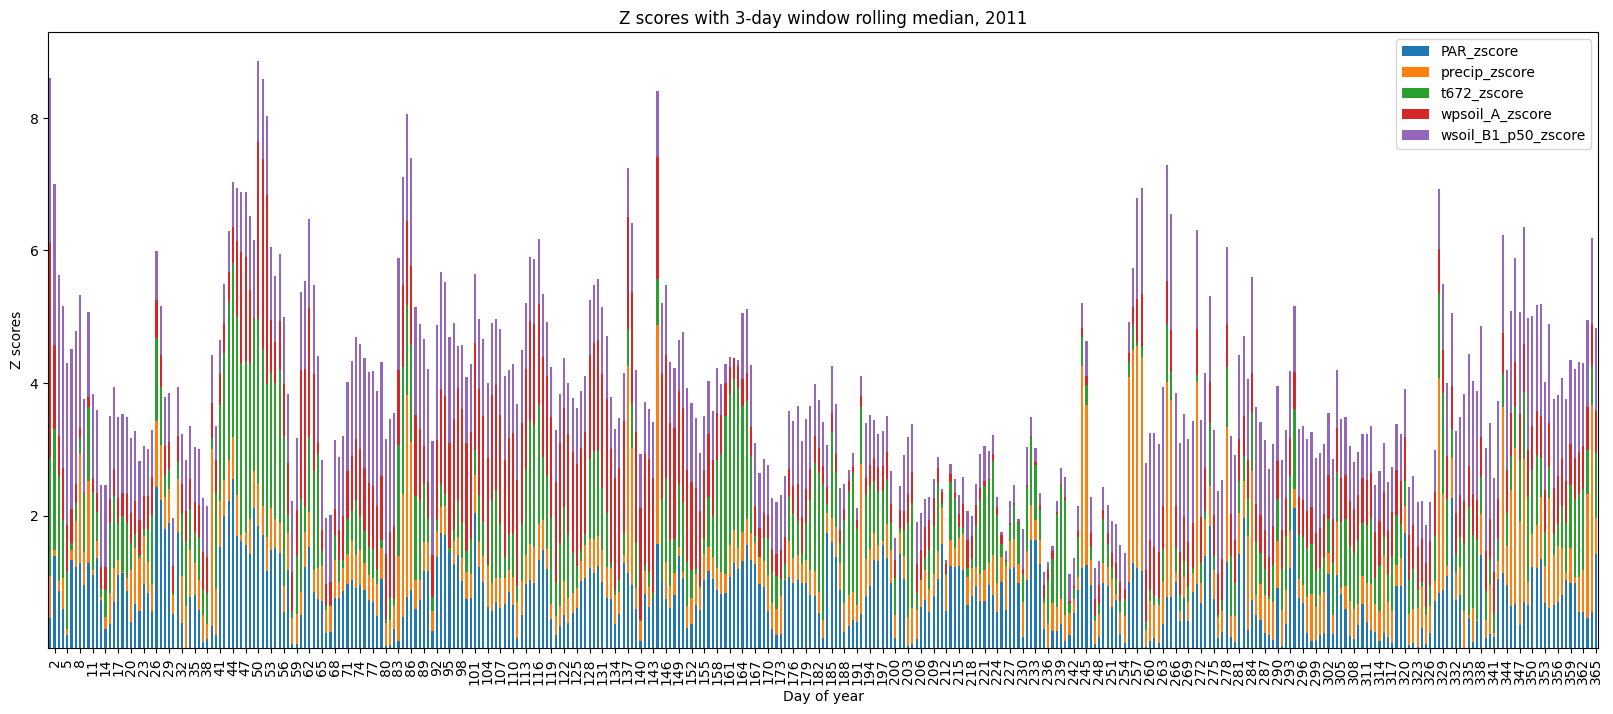

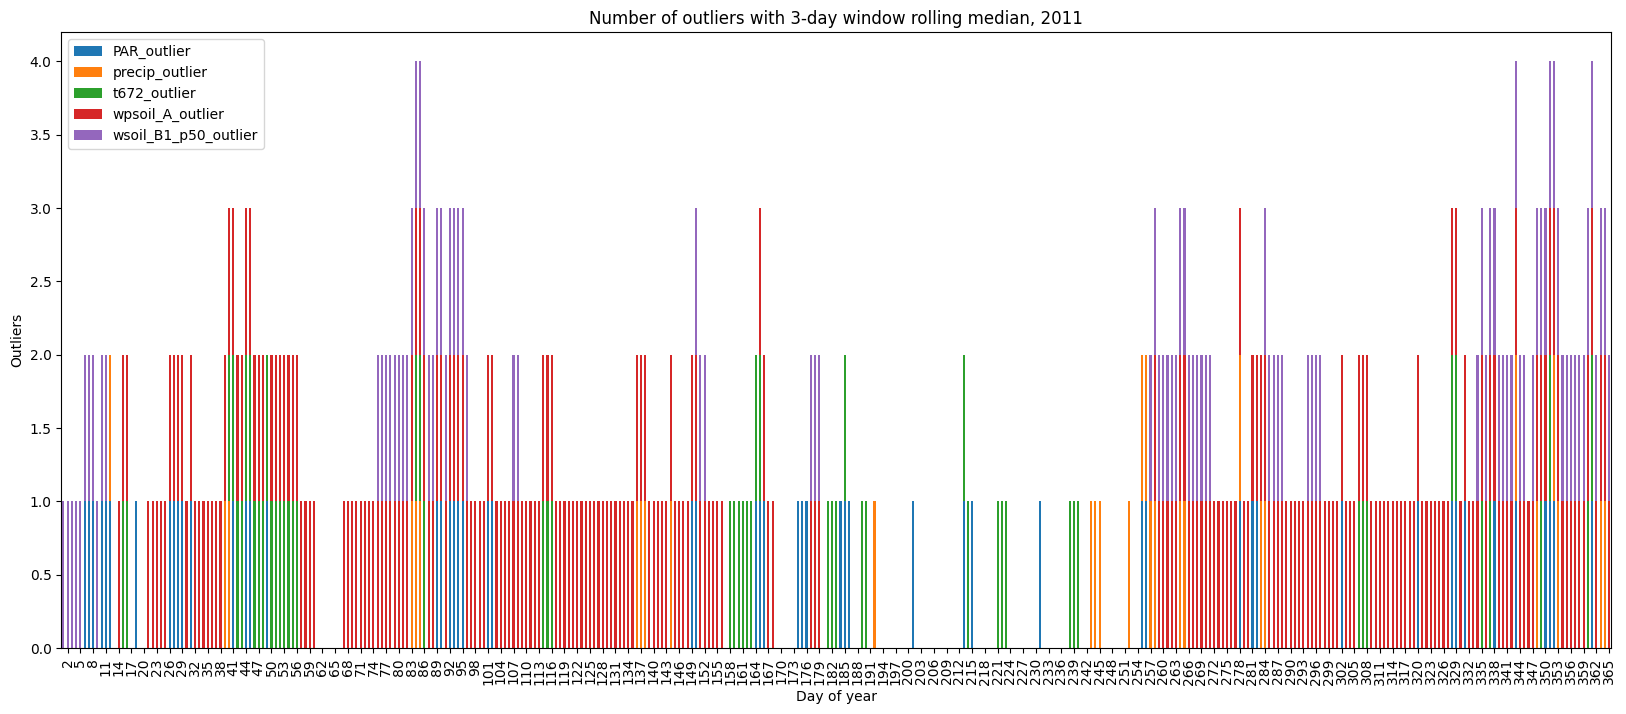

In [15]:
daily_df_med_2011.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2011.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2011.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2011')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2011.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2011.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2011.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2011')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2011.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2011.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2011.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2011')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()


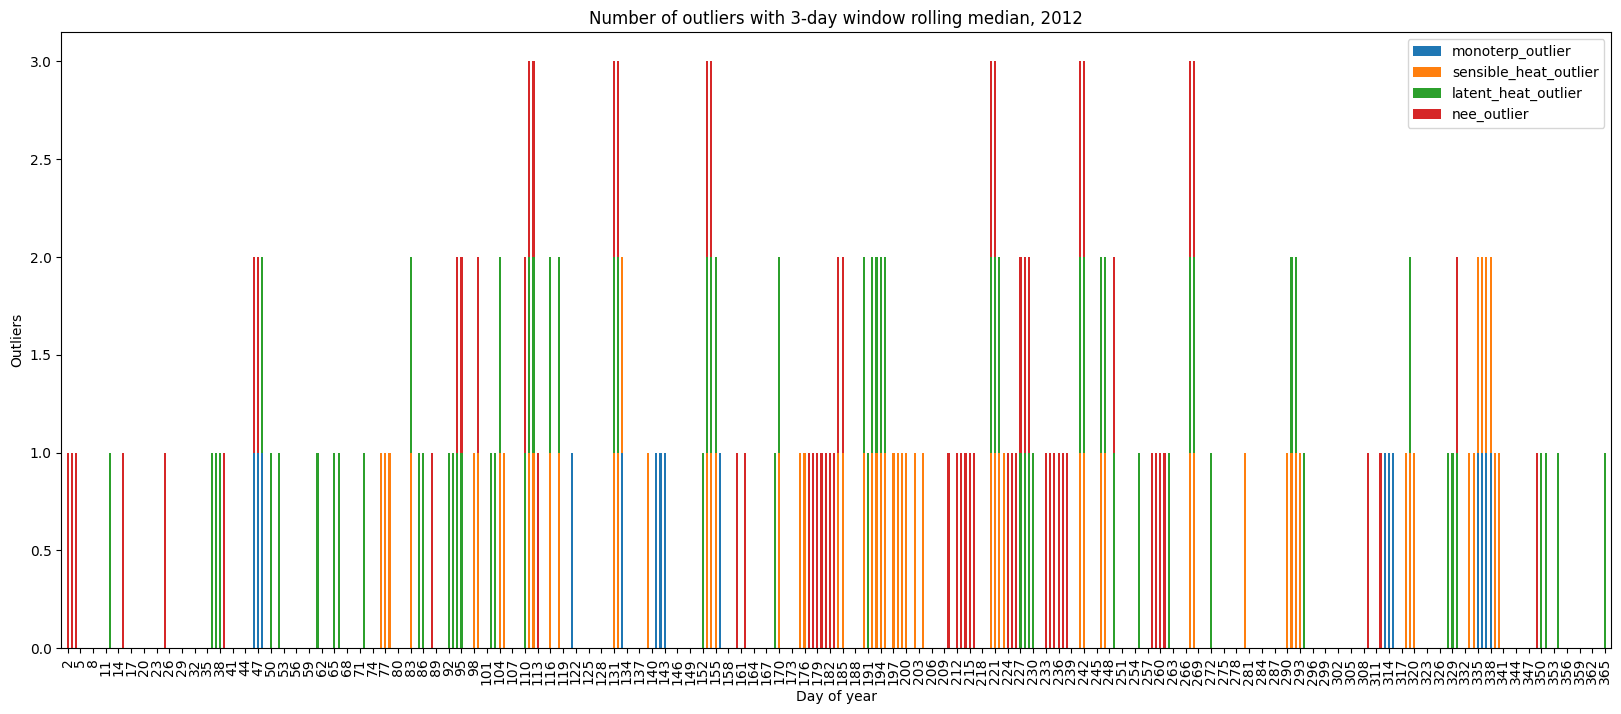

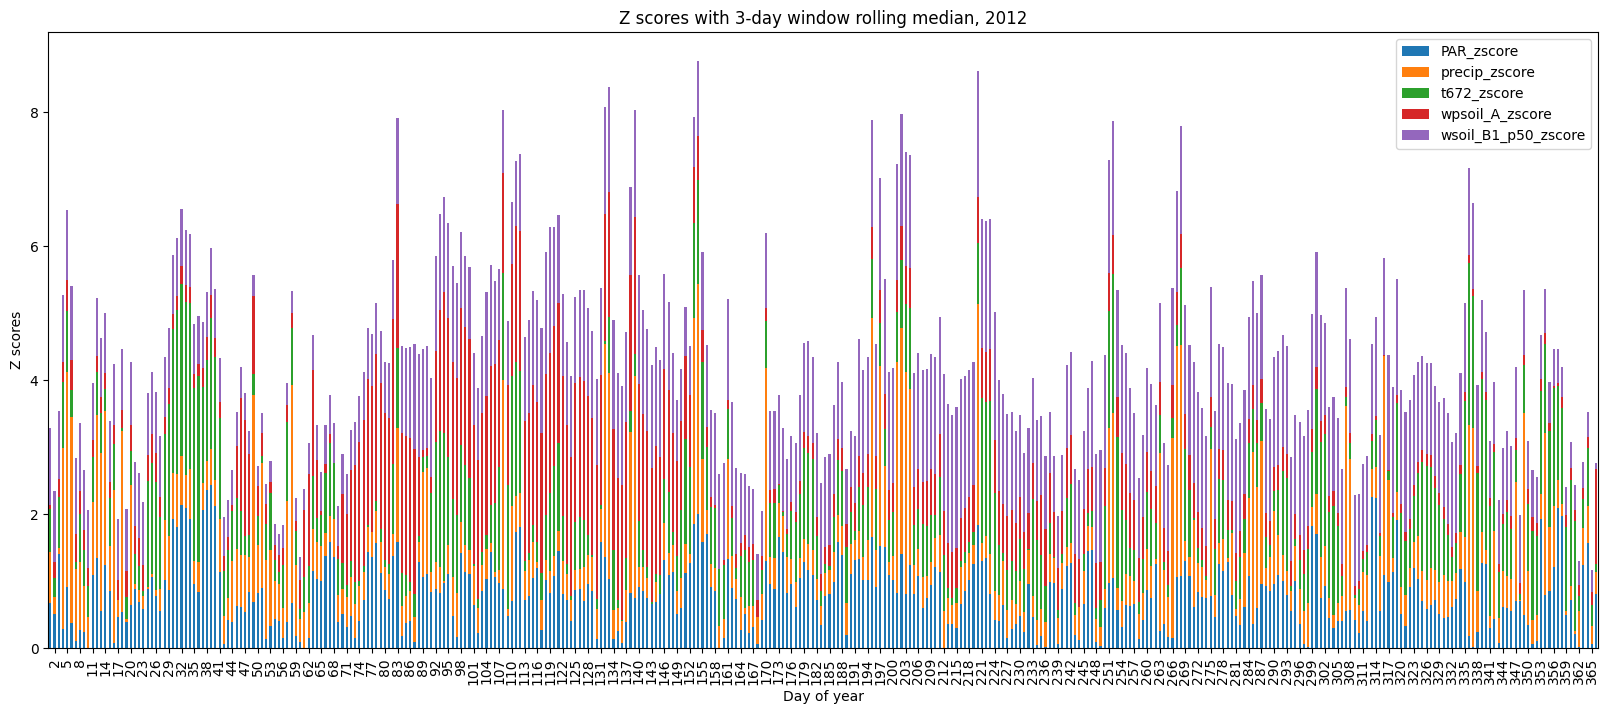

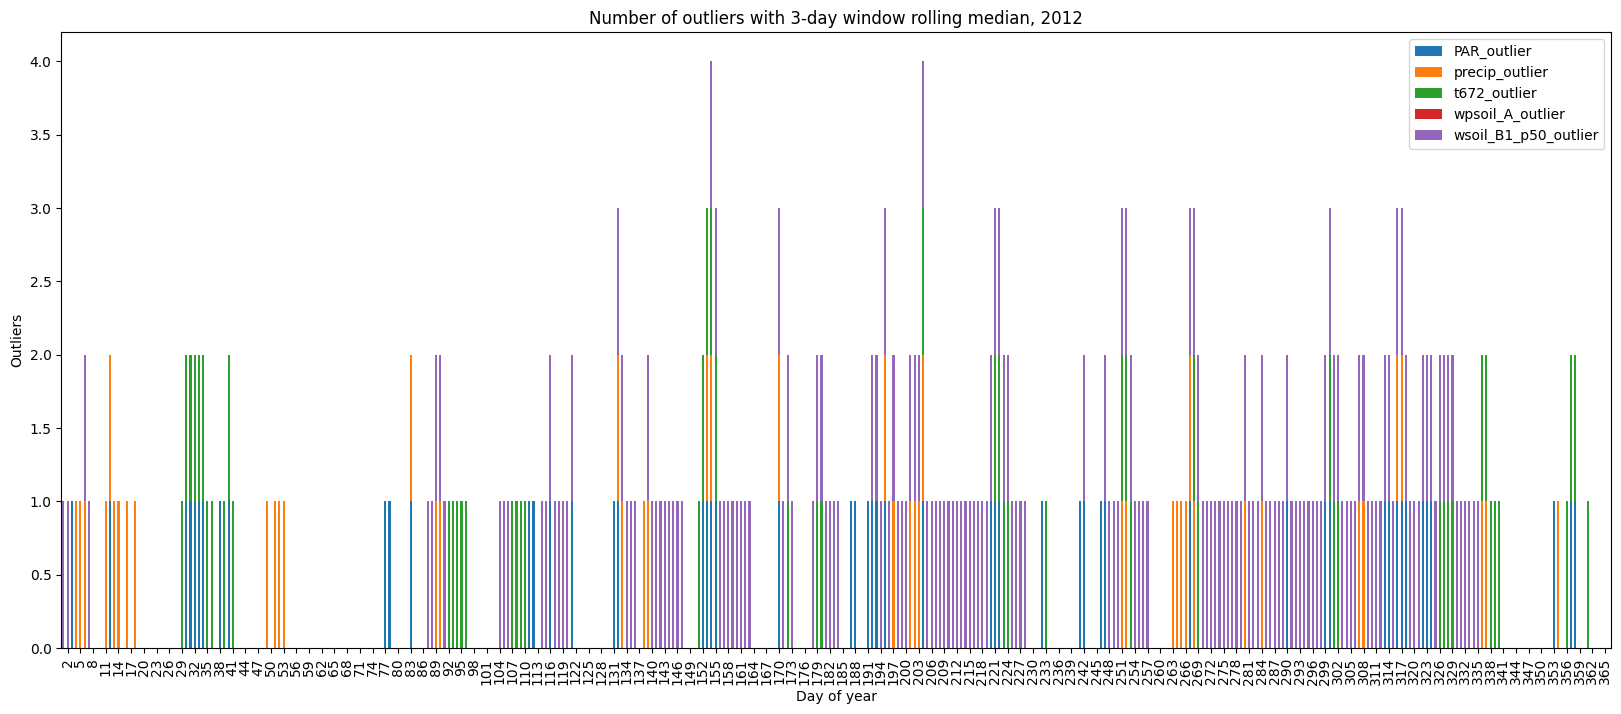

In [16]:
daily_df_med_2012.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2012.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2012.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2012')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2012.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2012.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2012.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2012')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2012.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2012.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2012.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2012')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()


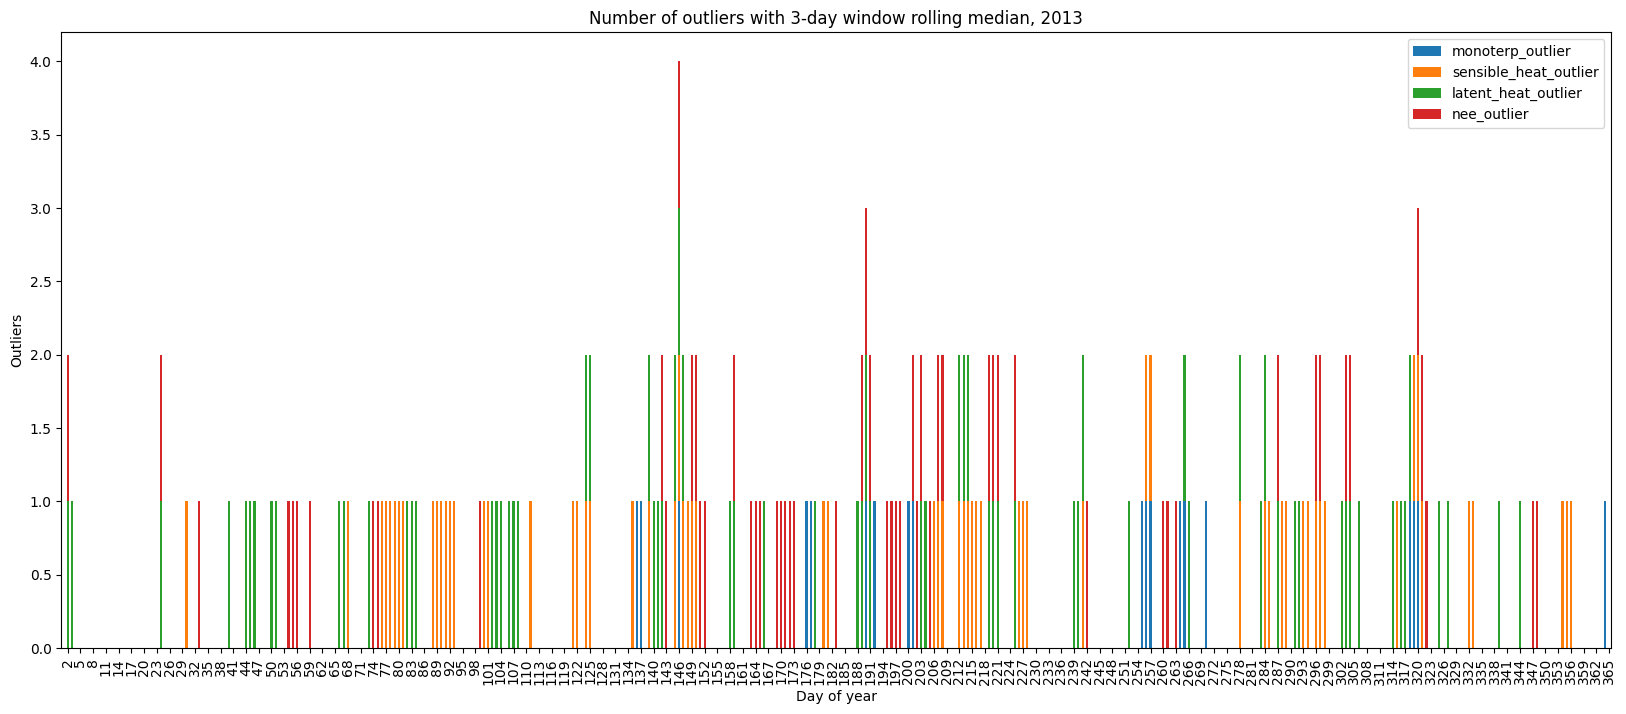

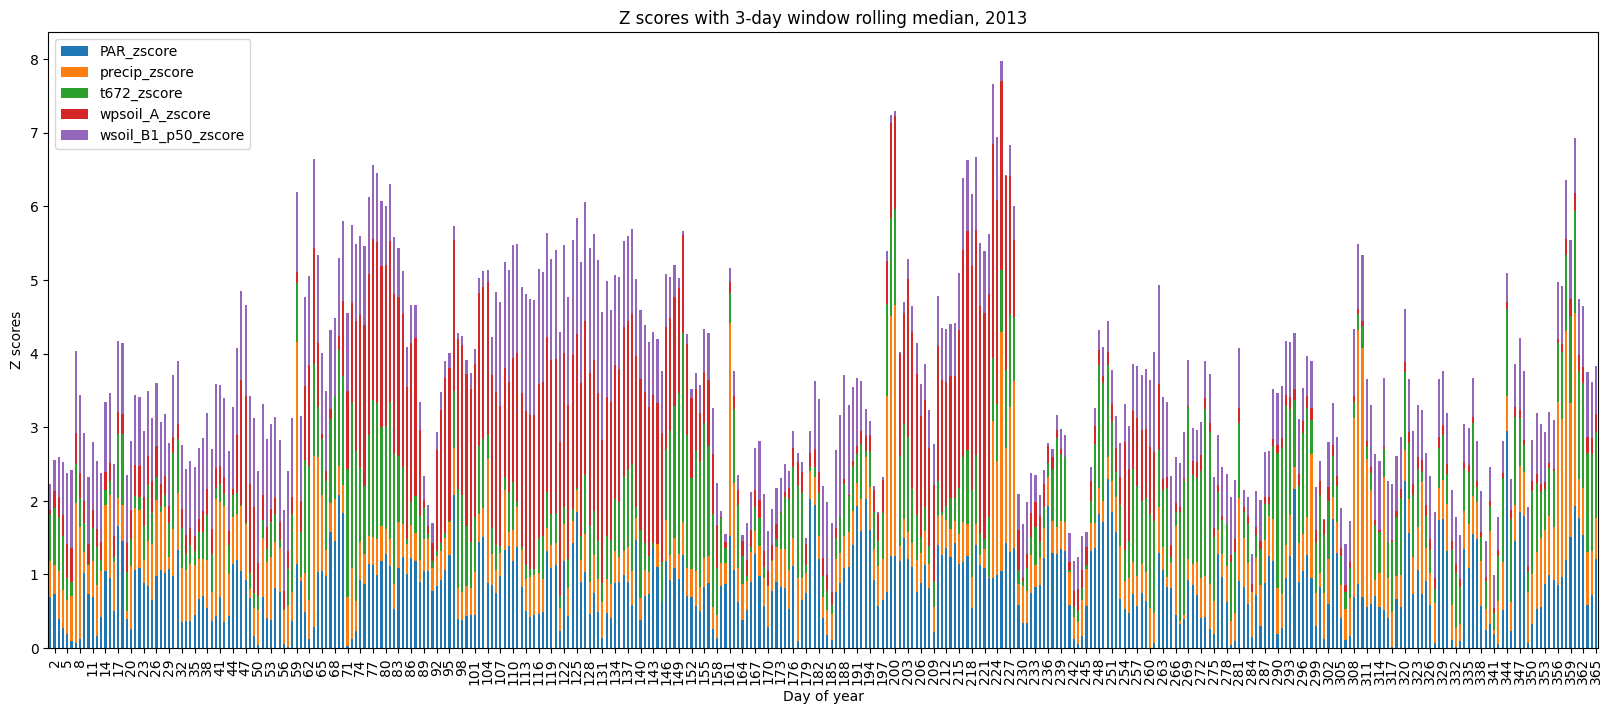

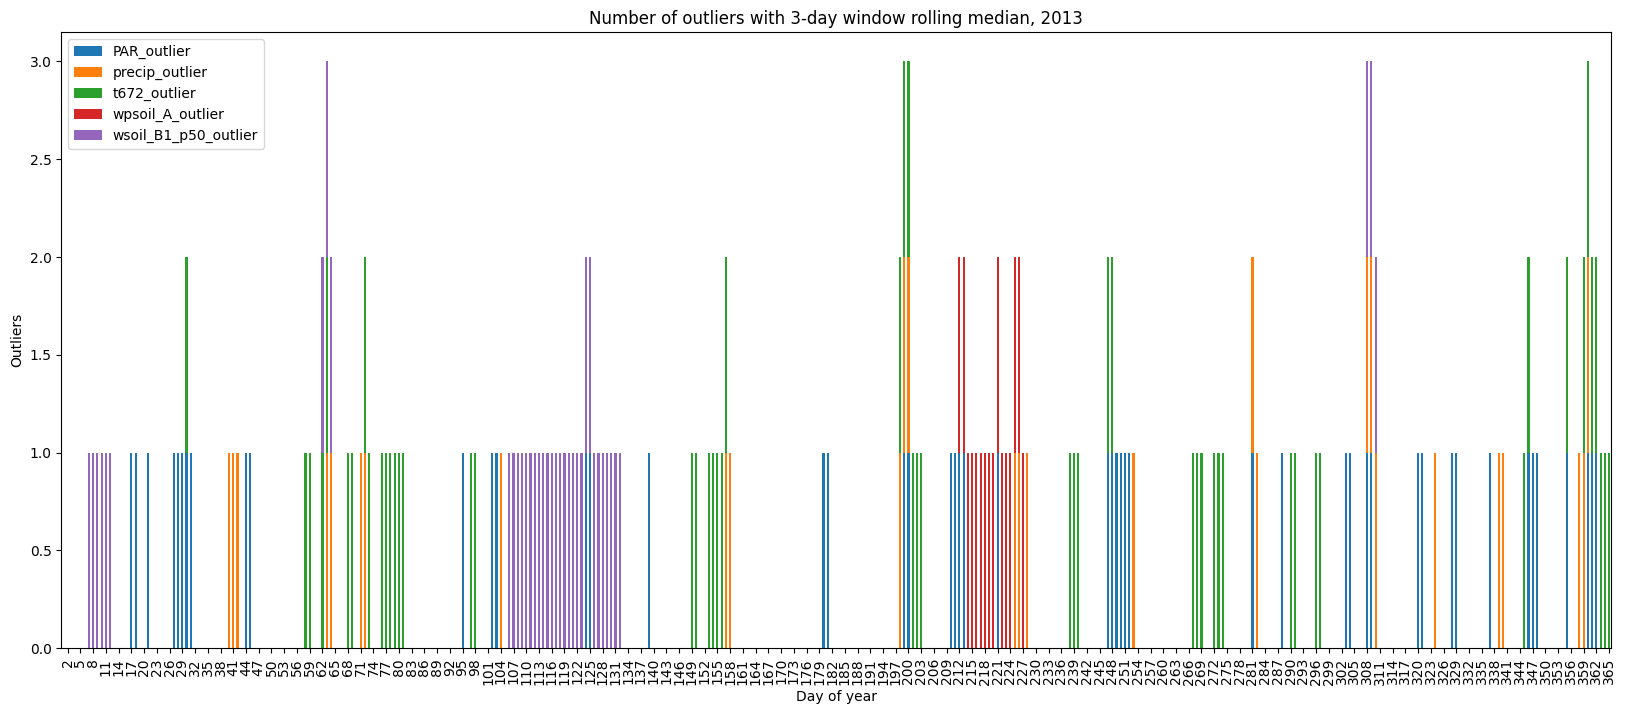

In [17]:
daily_df_med_2013.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2013.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2013.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2013')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2013.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2013.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2013.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2013')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2013.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2013.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2013.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2013')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()



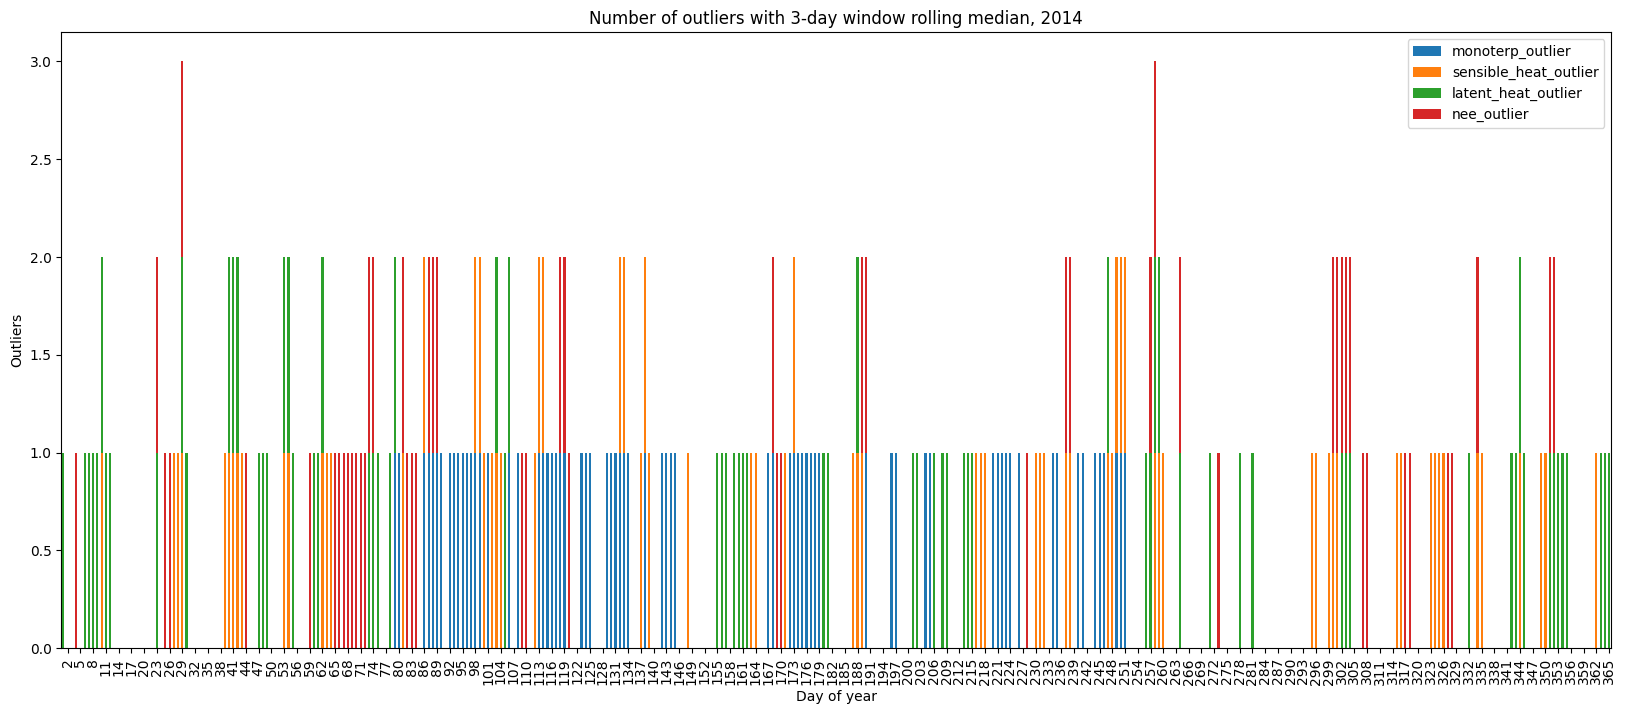

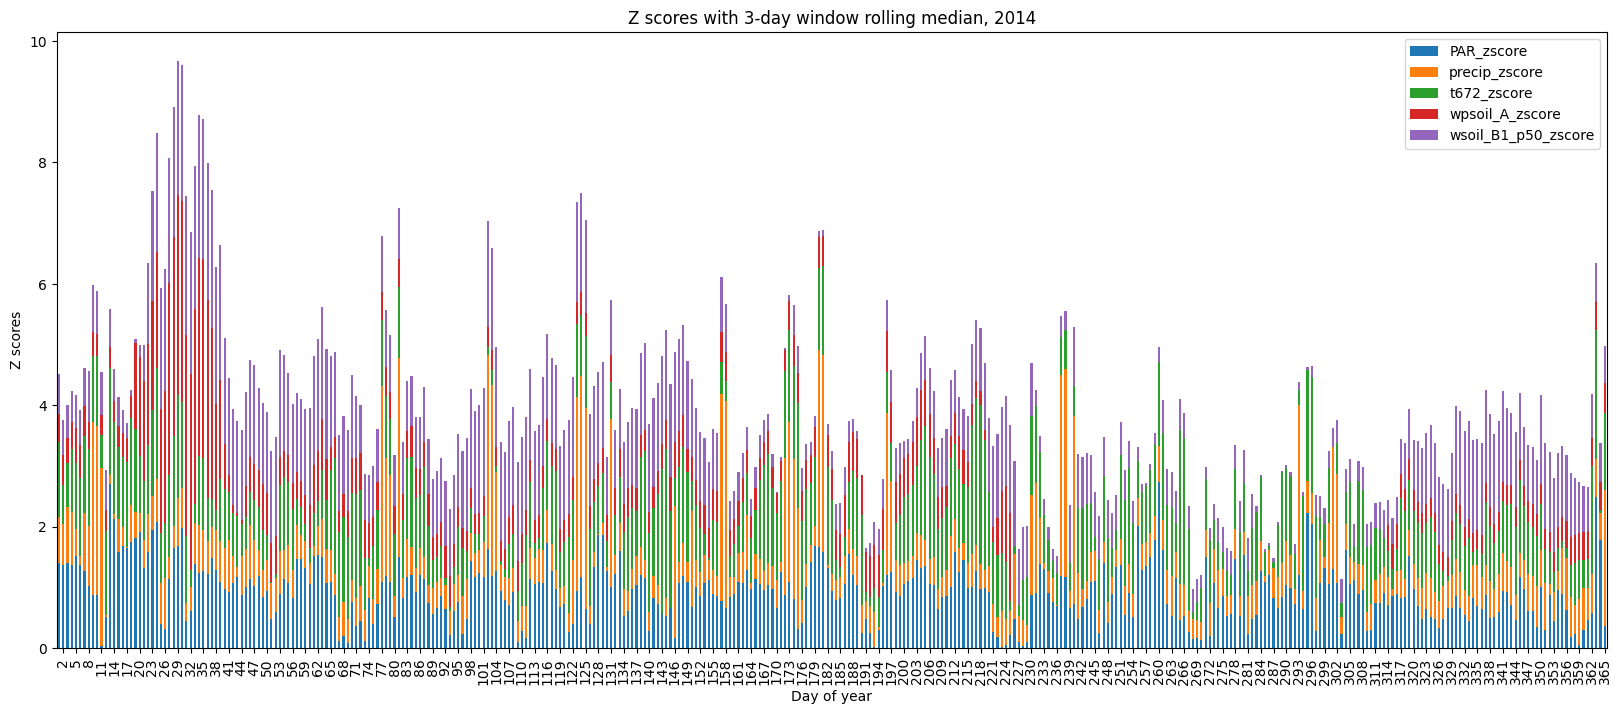

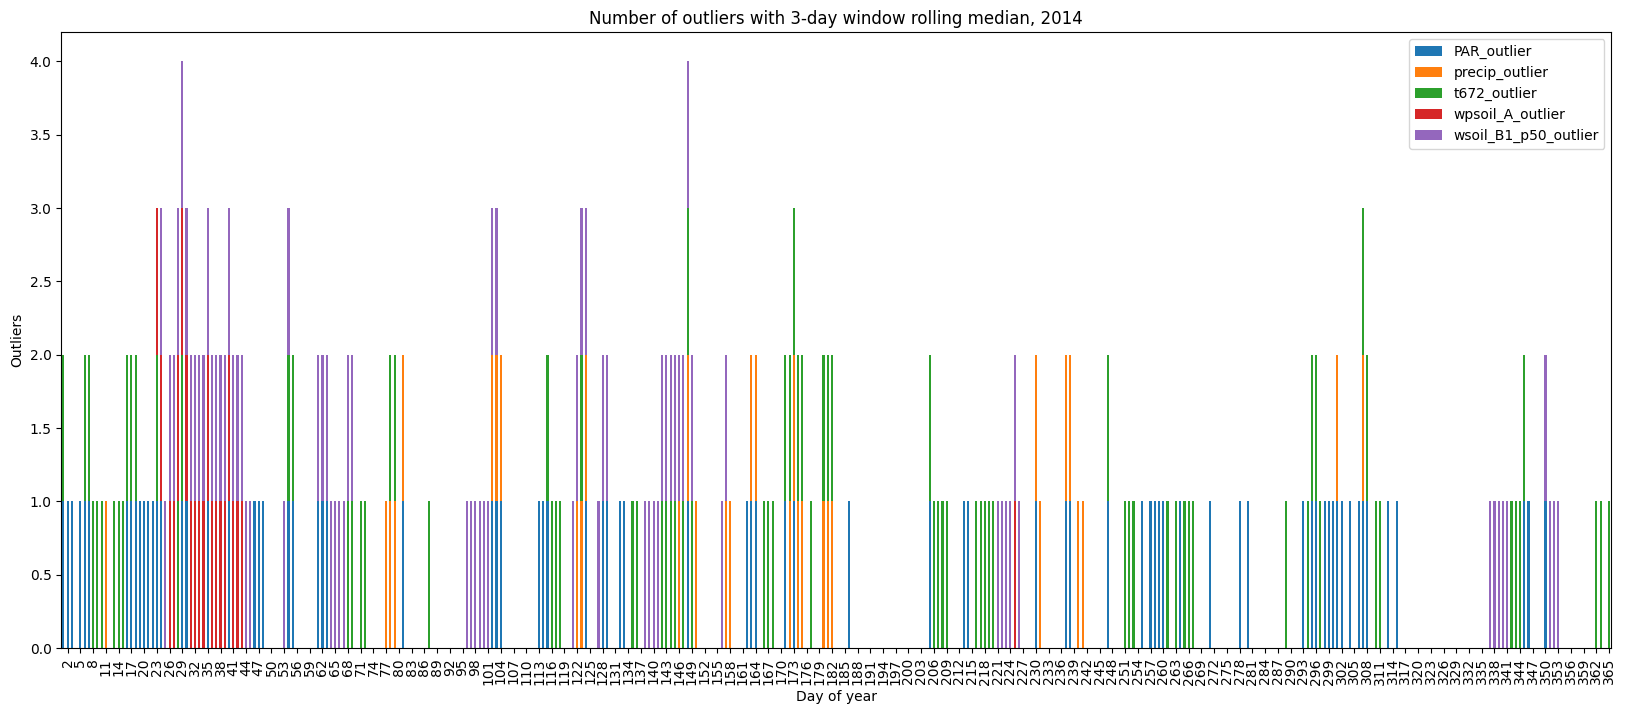

In [18]:
daily_df_med_2014.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2014.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2014.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2014')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2014.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2014.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2014.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2014')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2014.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2014.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2014.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2014')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()


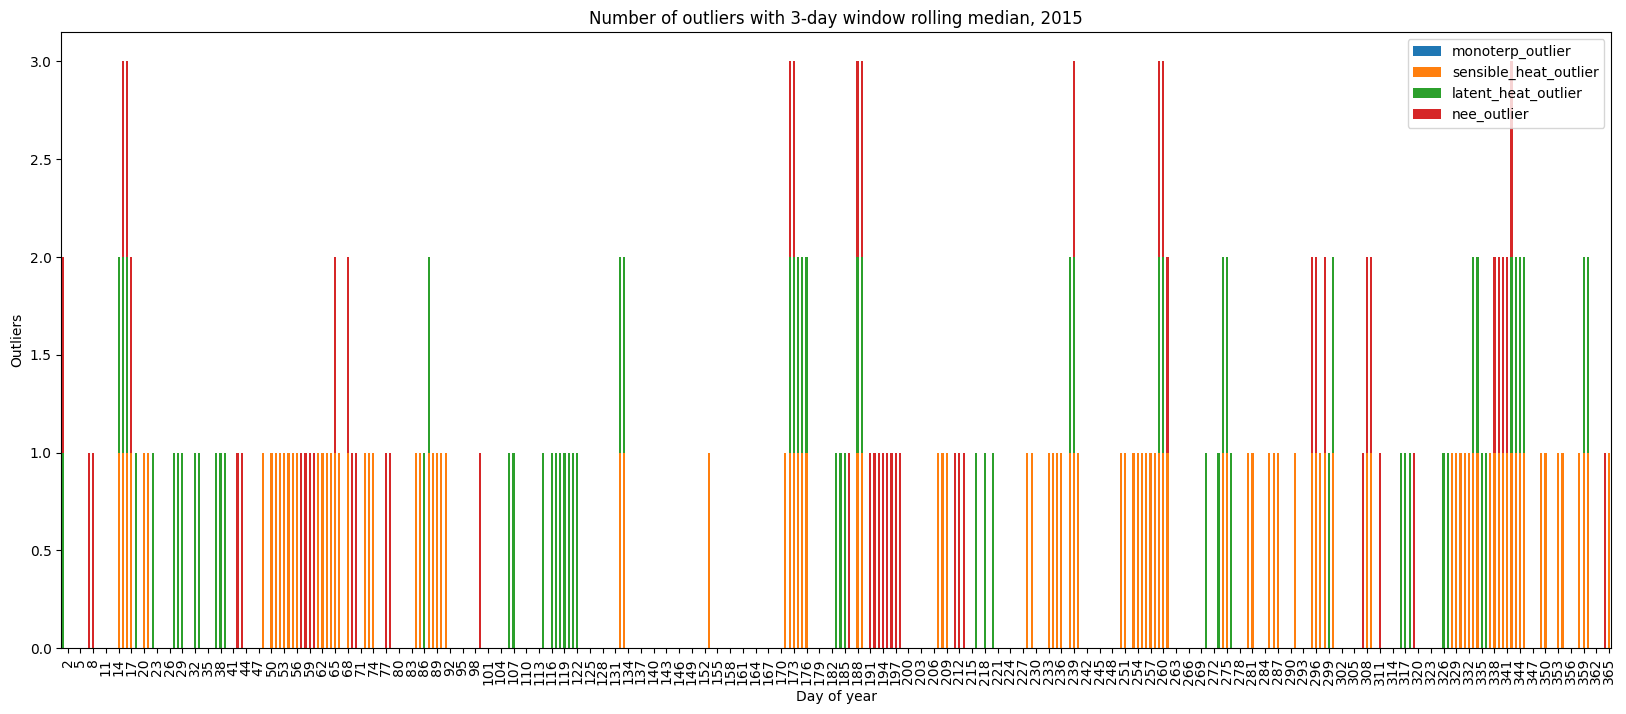

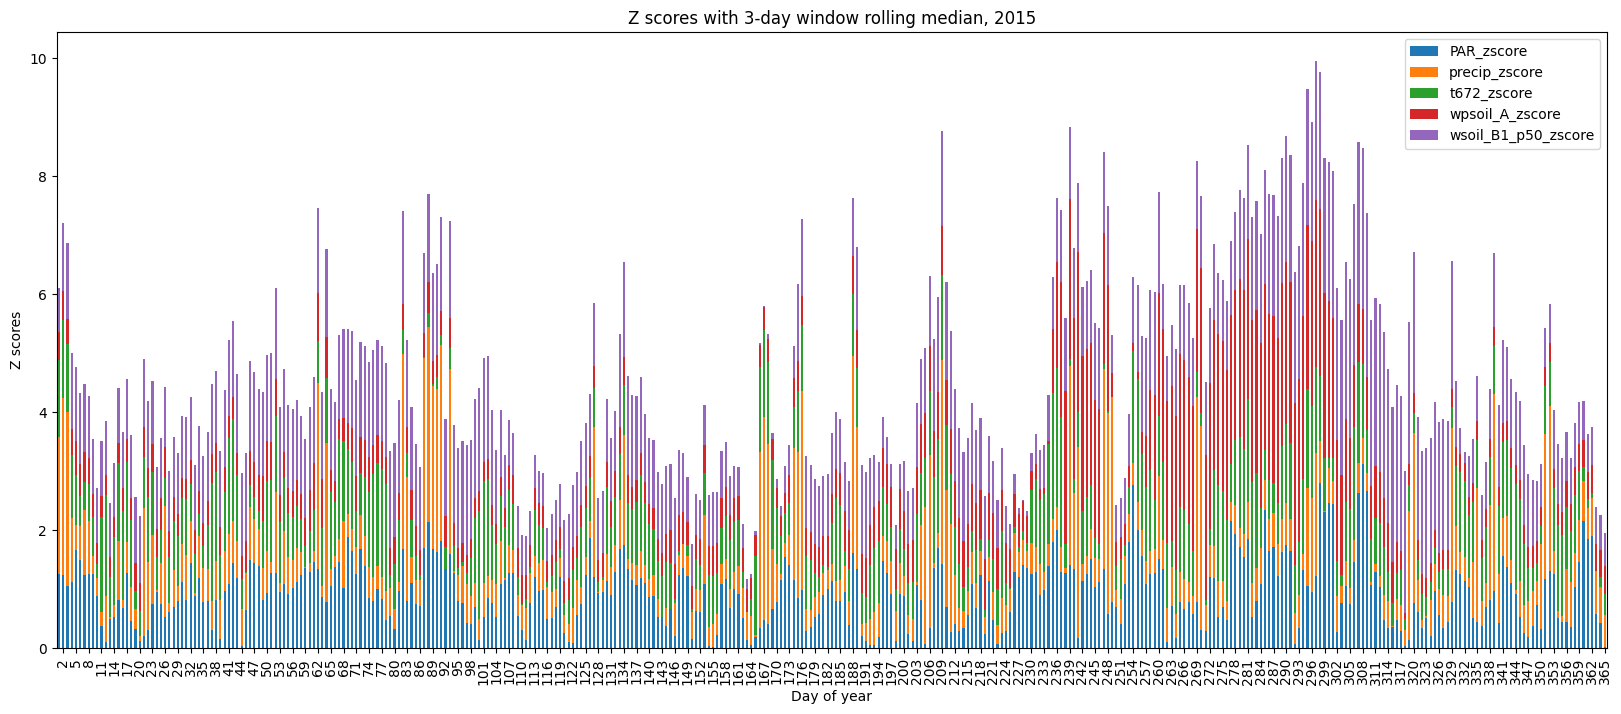

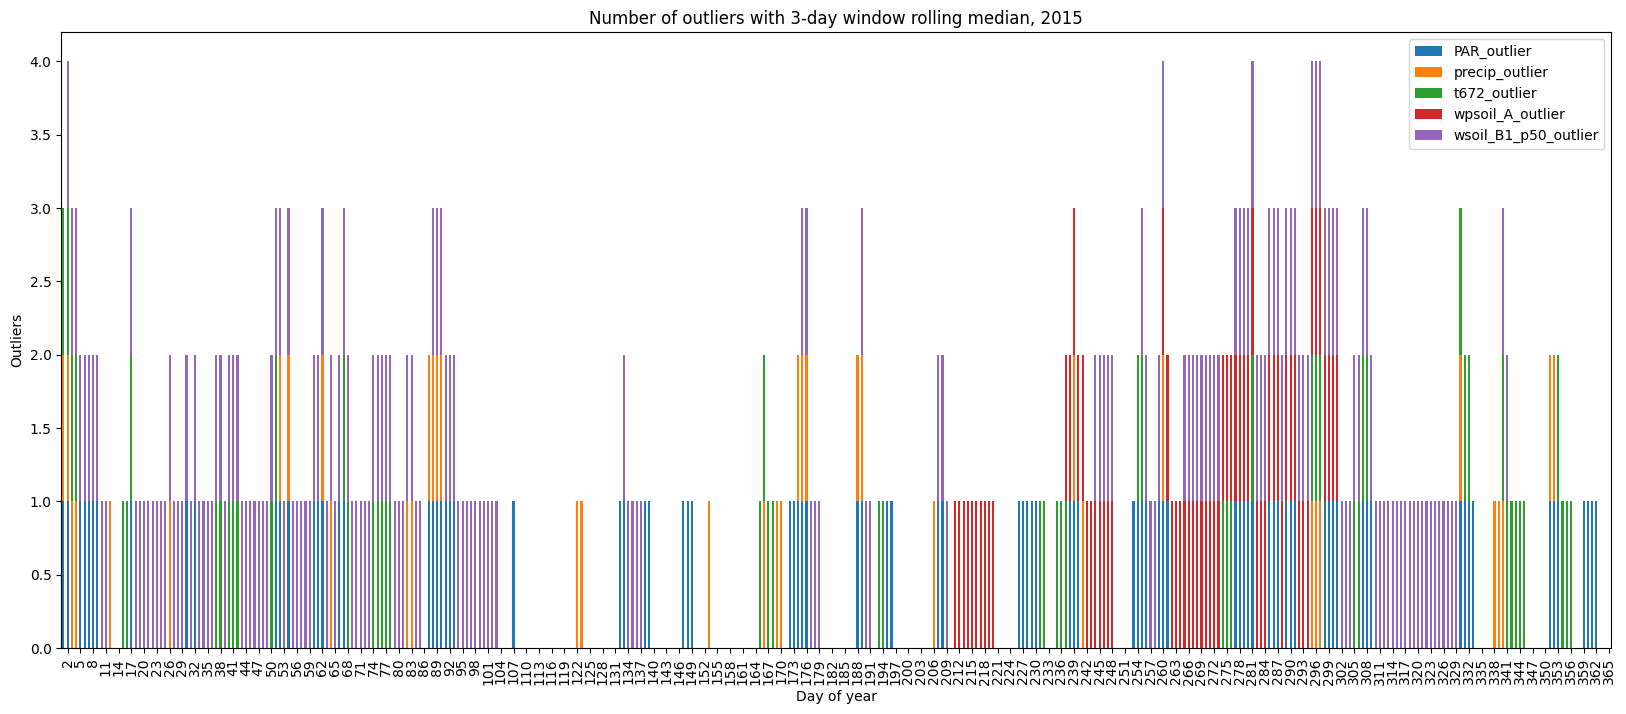

In [19]:
daily_df_med_2015.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2015.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2015.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2015')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2015.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2015.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2015.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2015')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2015.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2015.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2015.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2015')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()


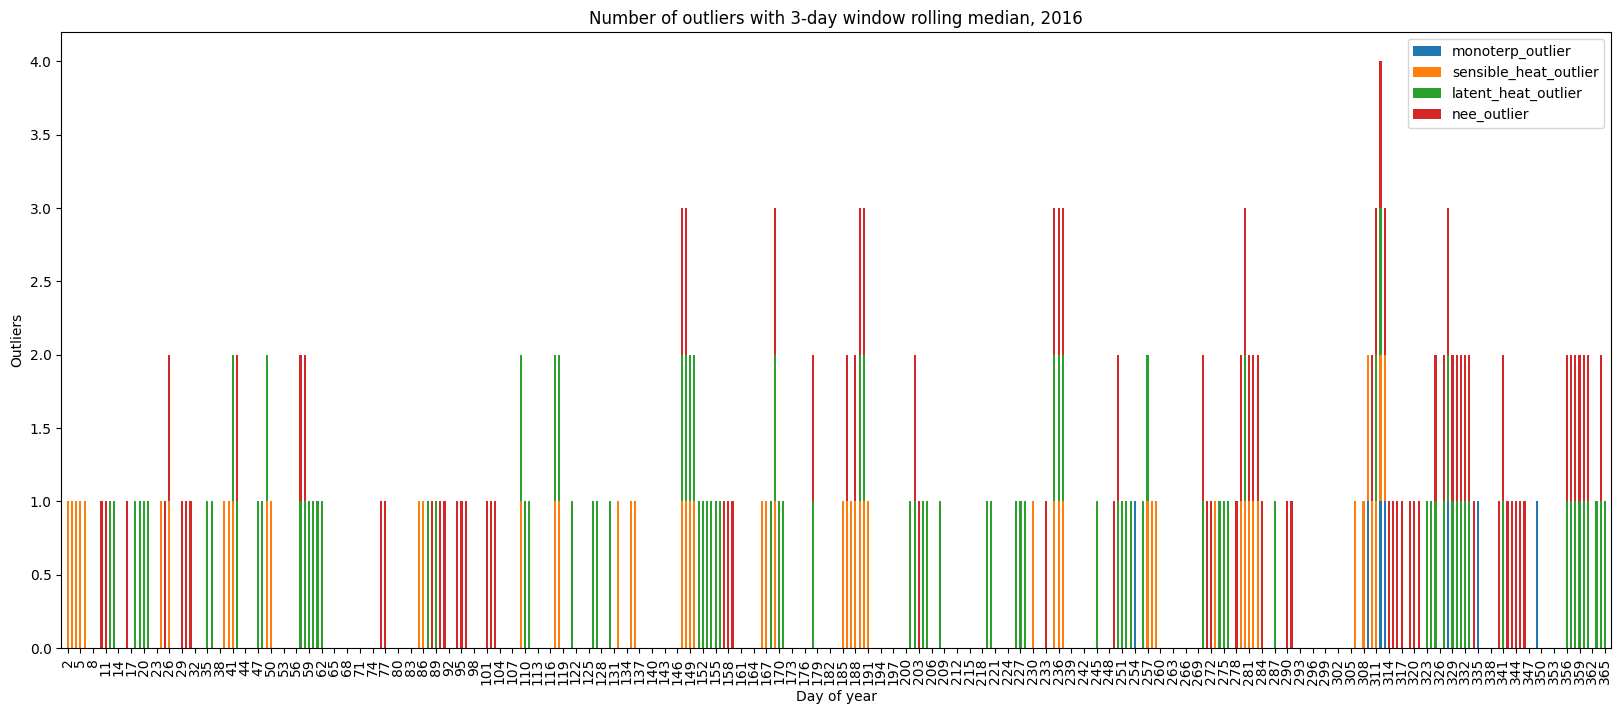

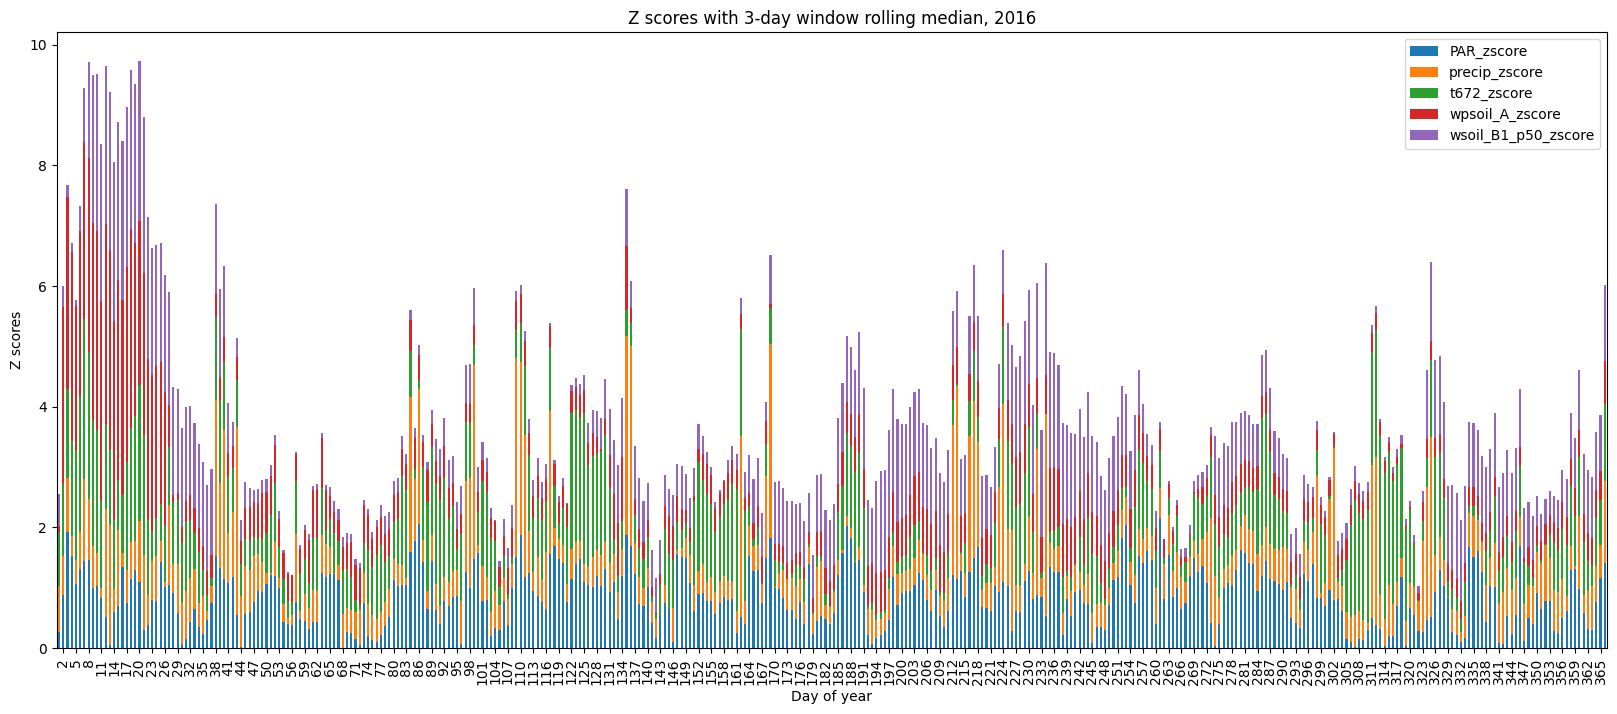

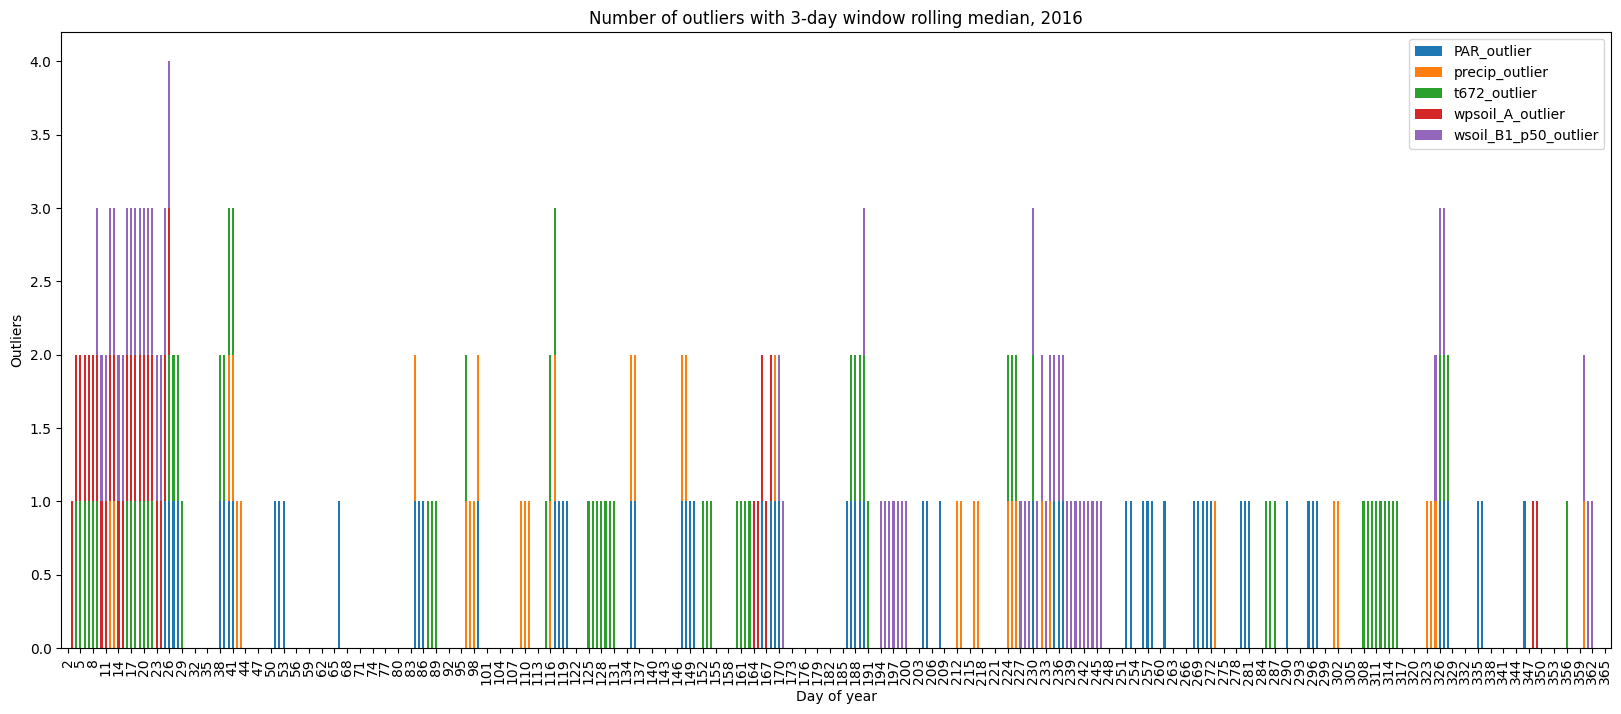

In [20]:
daily_df_med_2016.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2016.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2016.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2016')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2016.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2016.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2016.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2016')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2016.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2016.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2016.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2016')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()

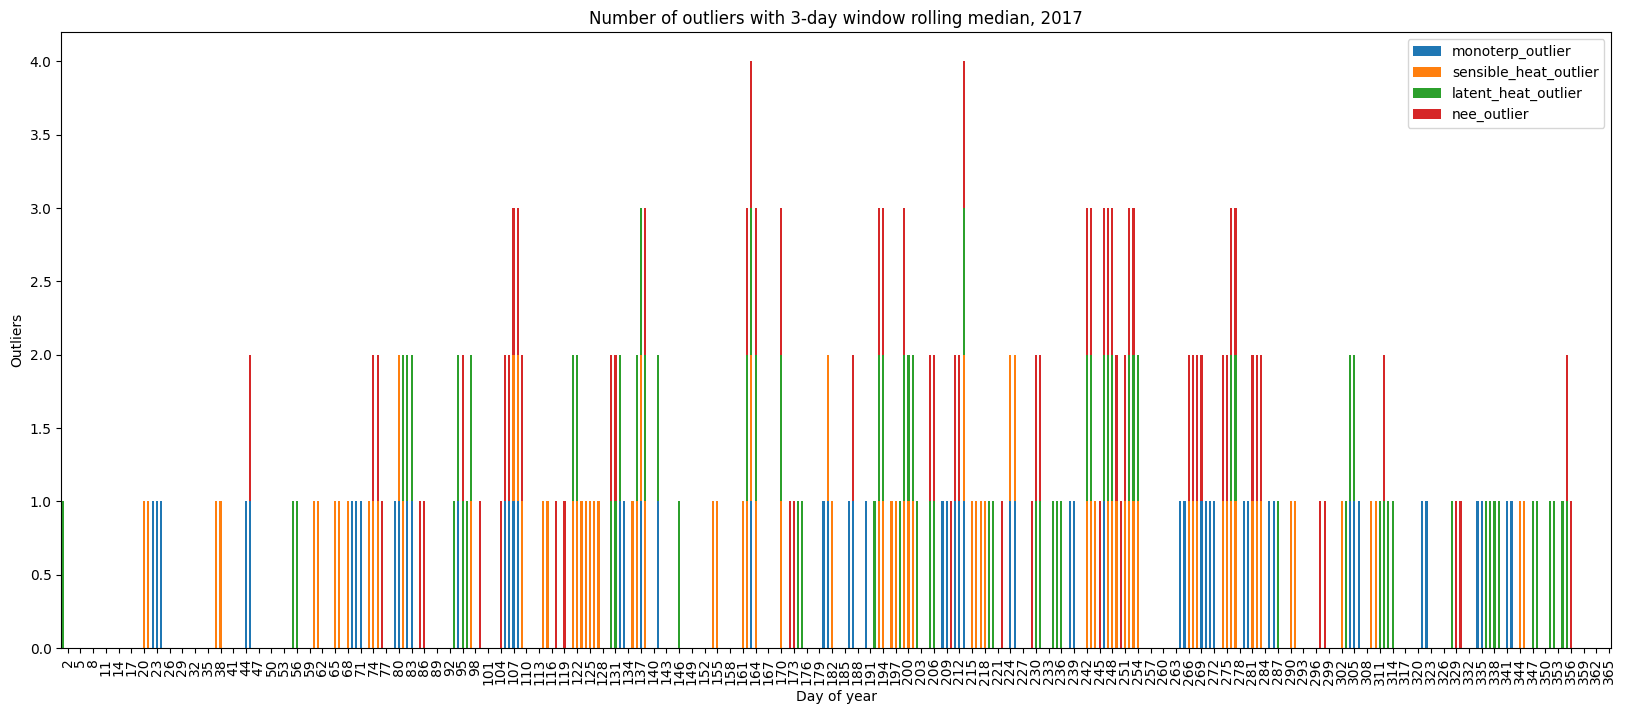

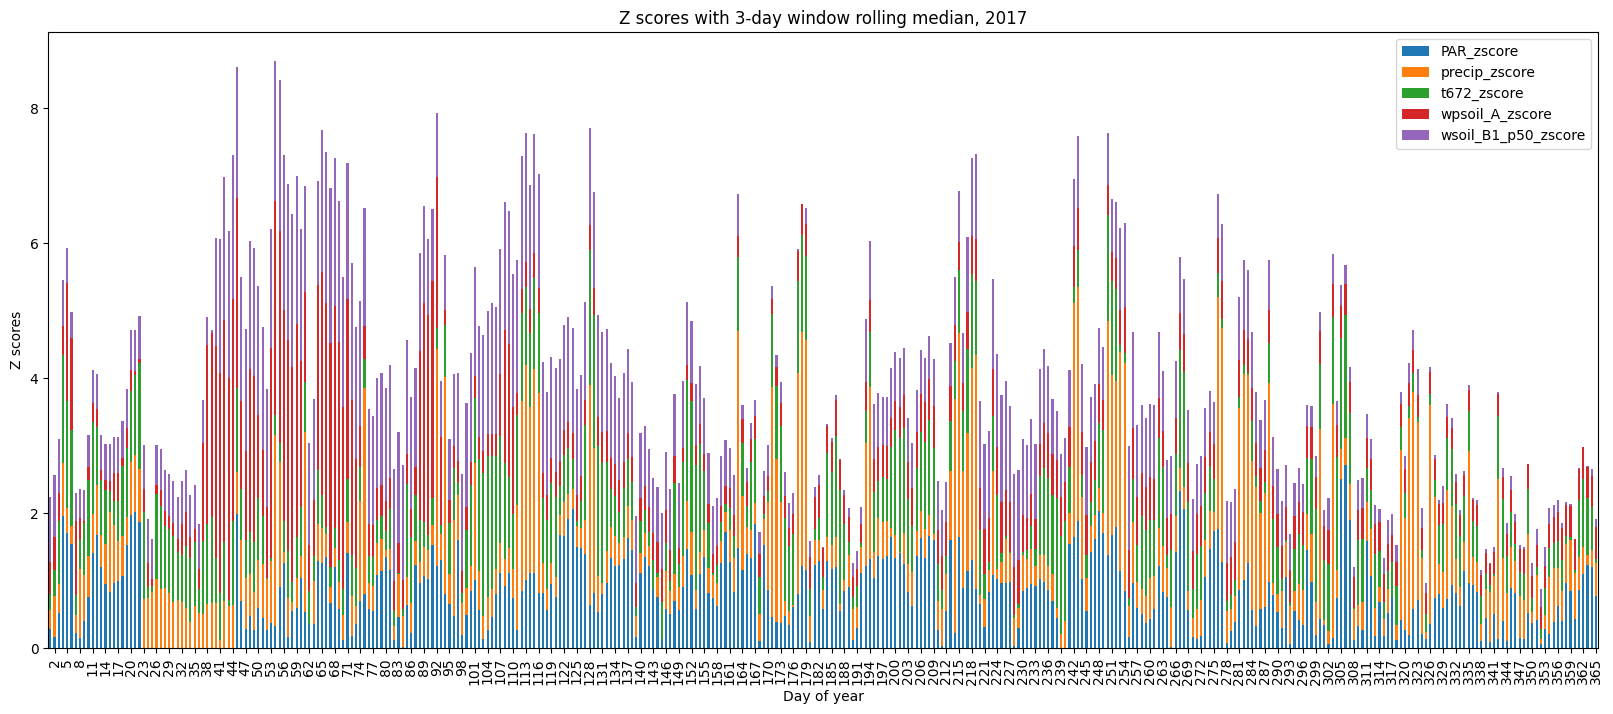

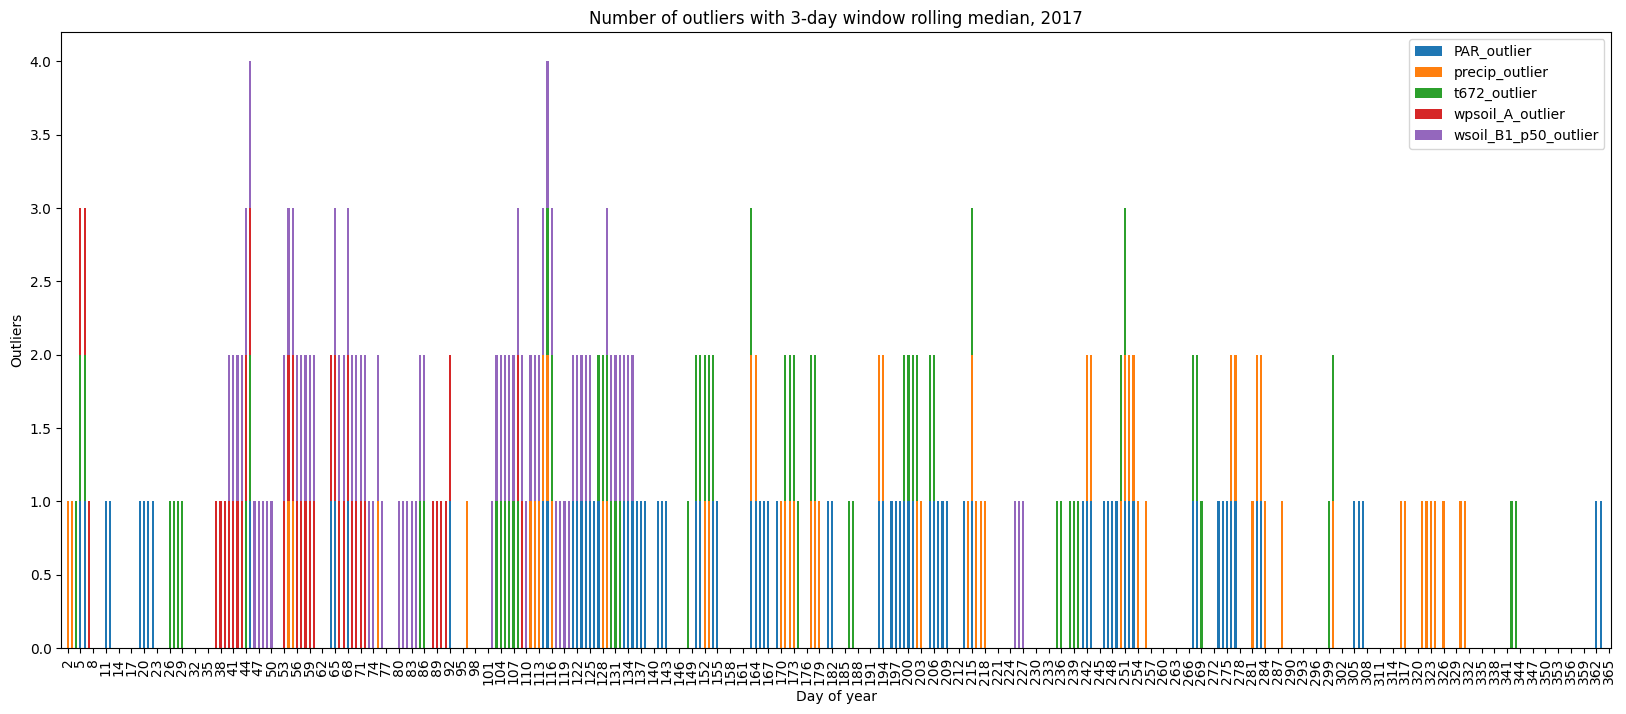

In [21]:
daily_df_med_2017.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2017.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2017.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2017')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2017.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2017.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2017.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2017')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2017.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2017.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2017.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2017')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()

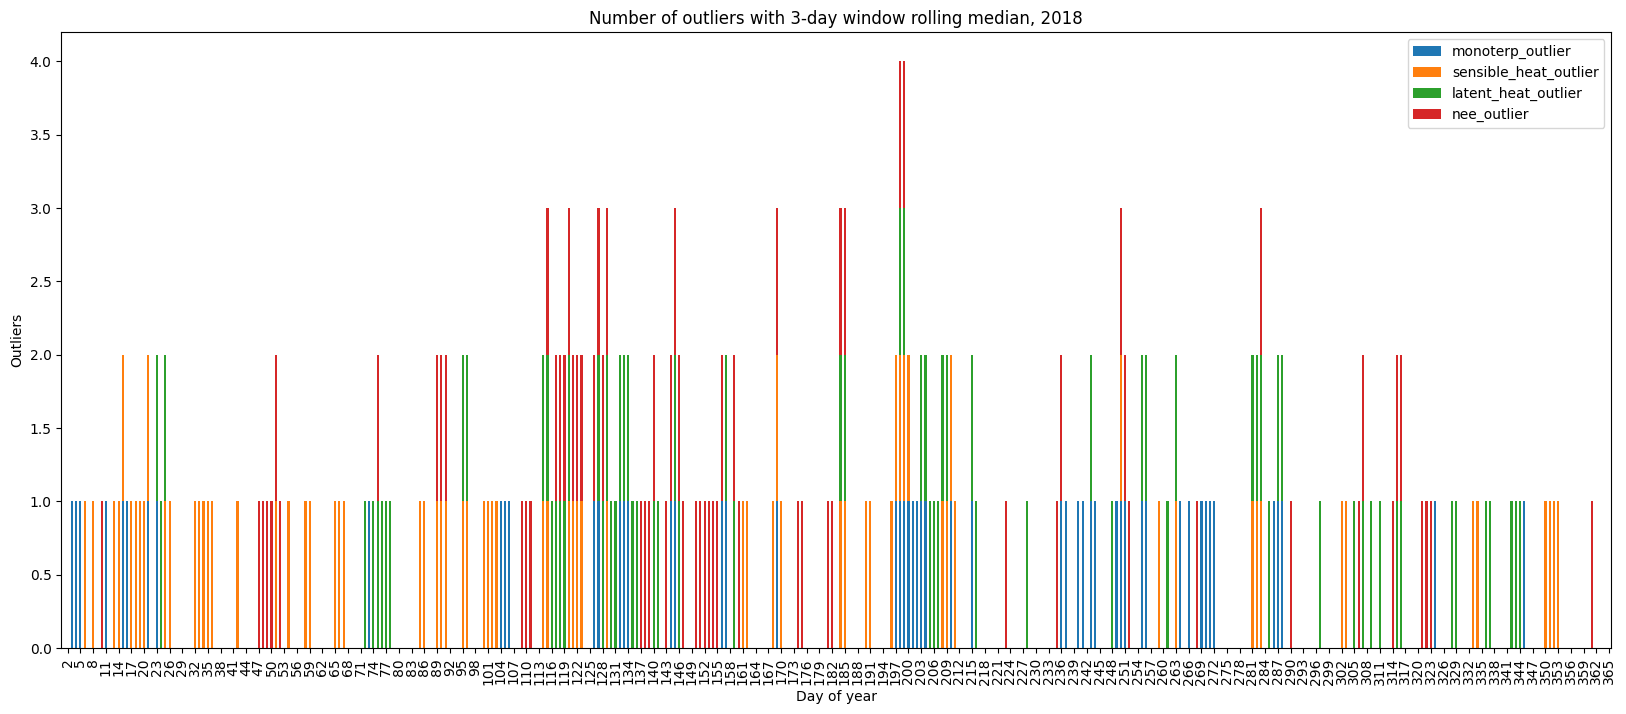

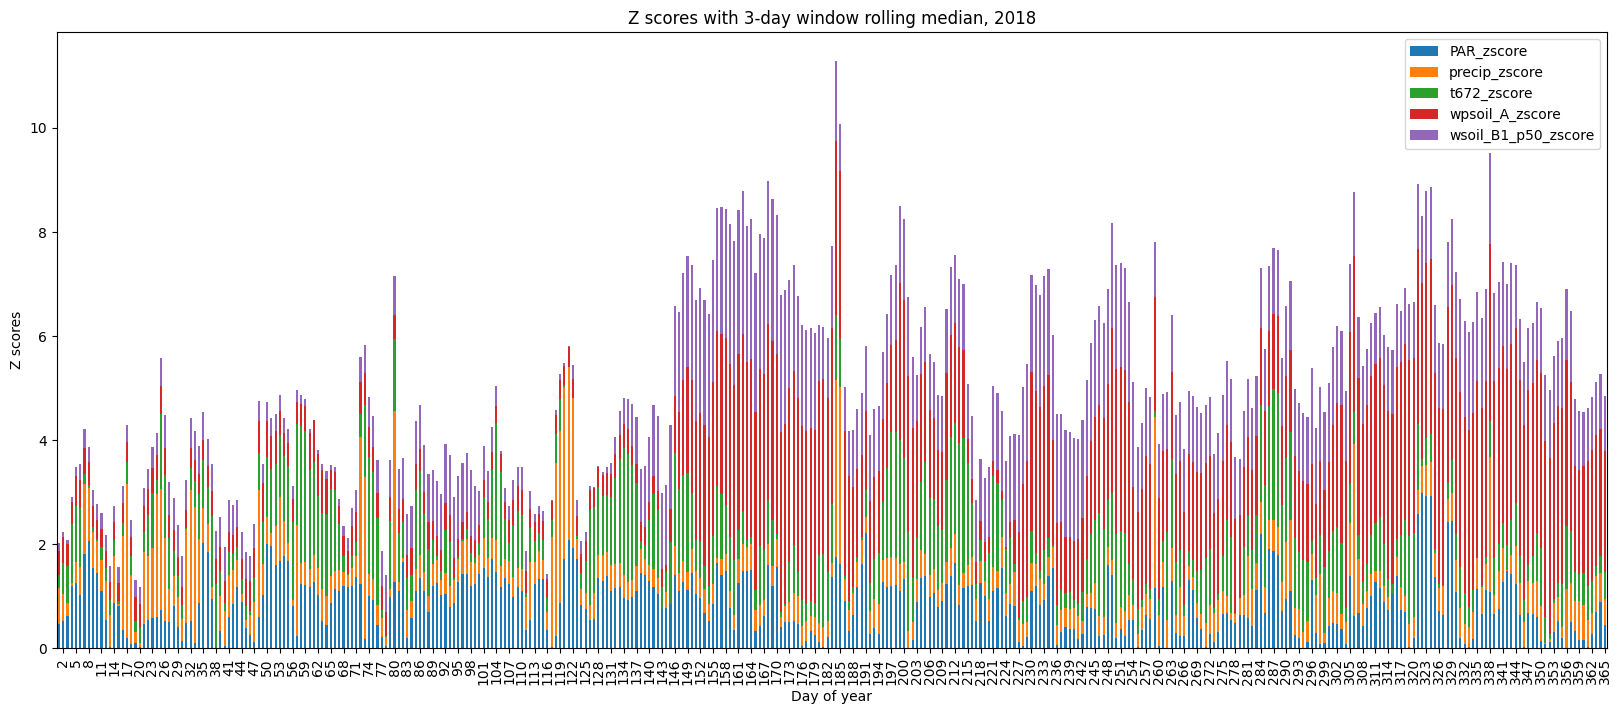

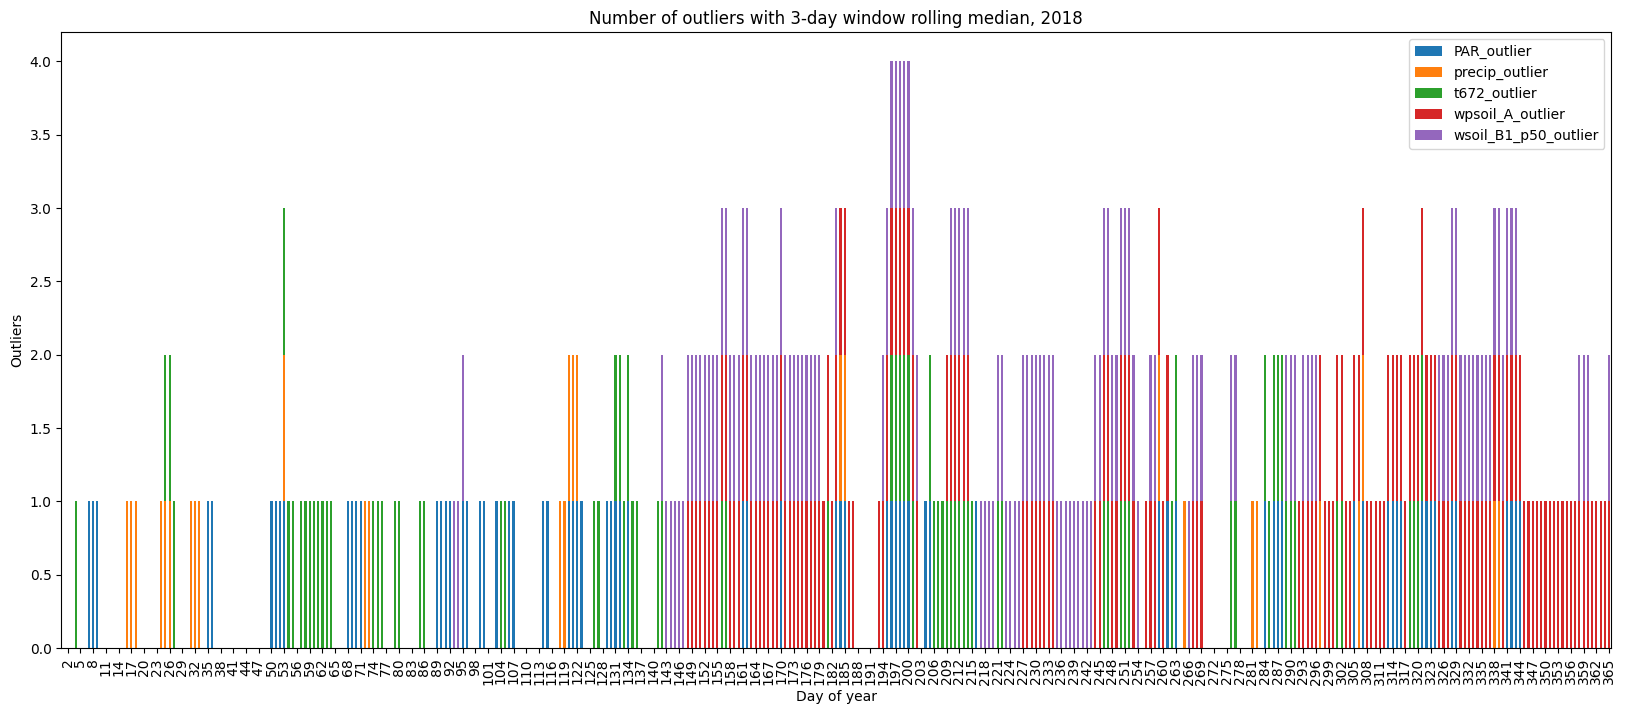

In [22]:
daily_df_med_2018.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2018.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2018.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2018')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2018.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2018.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2018.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2018')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2018.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2018.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2018.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2018')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()

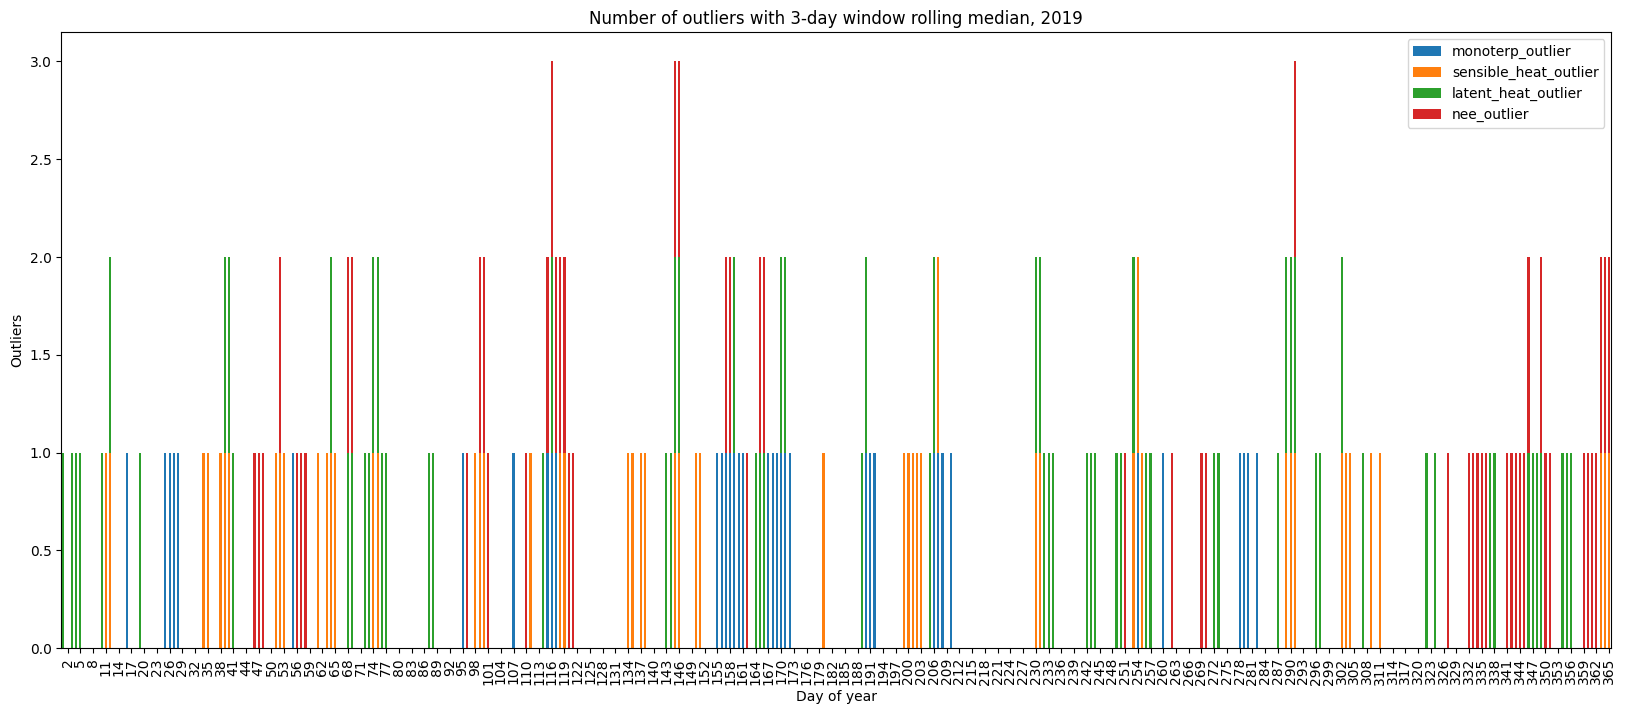

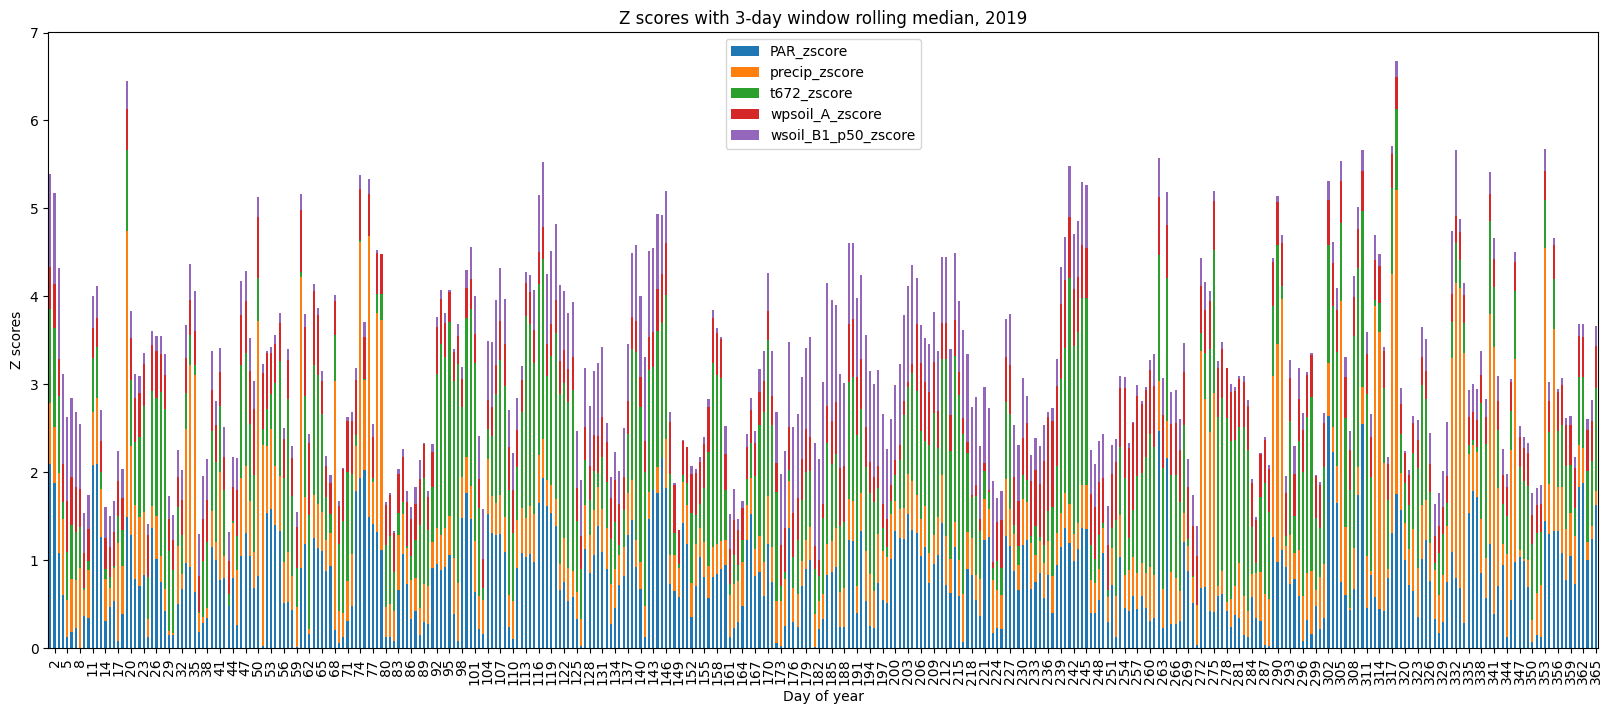

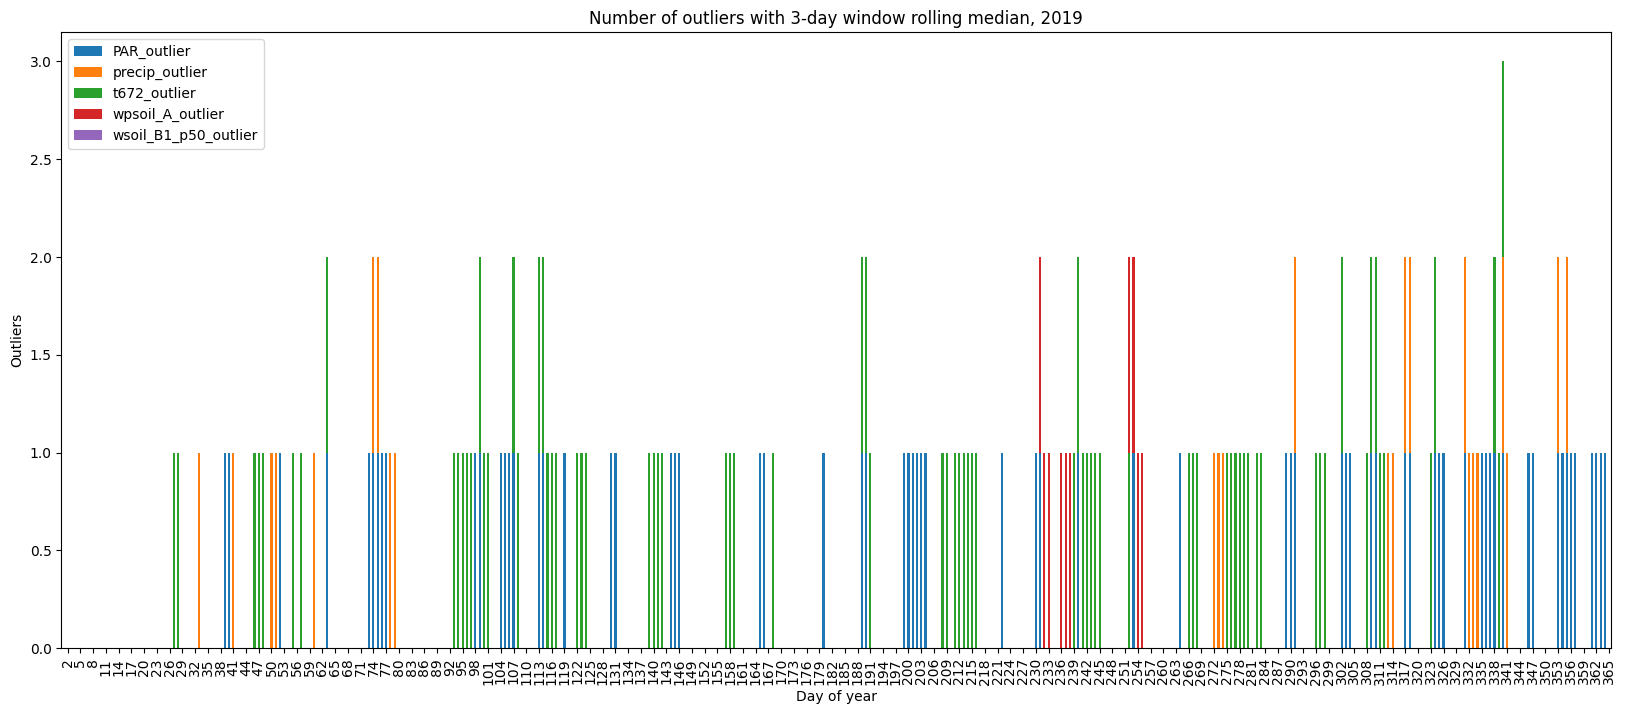

In [23]:
daily_df_med_2019.iloc[:,9:13].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2019.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2019.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2019')
plt.xlabel('Day of year')
plt.ylabel('Outliers')

daily_df_med_2019.iloc[:,4:9].abs().plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2019.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2019.index + 1)[np.array(ticks)-1])
plt.title(f'Z scores with {WINDOW_SIZE}-day window rolling {metric}, 2019')
plt.xlabel('Day of year')
plt.ylabel('Z scores')

daily_df_med_2019.iloc[:,13:].plot(kind='bar', stacked=True, figsize=(20, 8))

ticks = list(range(1, len(daily_df_med_2019.index)+1, 3))

plt.xticks(ticks, labels=np.array(daily_df_med_2019.index + 1)[np.array(ticks)-1])
plt.title(f'Number of outliers with {WINDOW_SIZE}-day window rolling {metric}, 2019')
plt.xlabel('Day of year')
plt.ylabel('Outliers')
plt.show()

# Possible stress periods

In [24]:
daily_df_med['pos_stress']=0
daily_df_med.loc[sum([daily_df_med['monoterp_outlier'],daily_df_med['sensible_heat_outlier'],daily_df_med['latent_heat_outlier'],daily_df_med['nee_outlier']])>1,'pos_stress']=1

0.21996411999683357
0.19119223241819935
0.10228303960870598
0.09477039938182273
0.06607296022699943
0.04567641028736387
-0.020889676427288336
-0.016009349595683477
-0.007846047992642952
-0.013824729949716872


/home/jani/miniconda3/envs/general/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


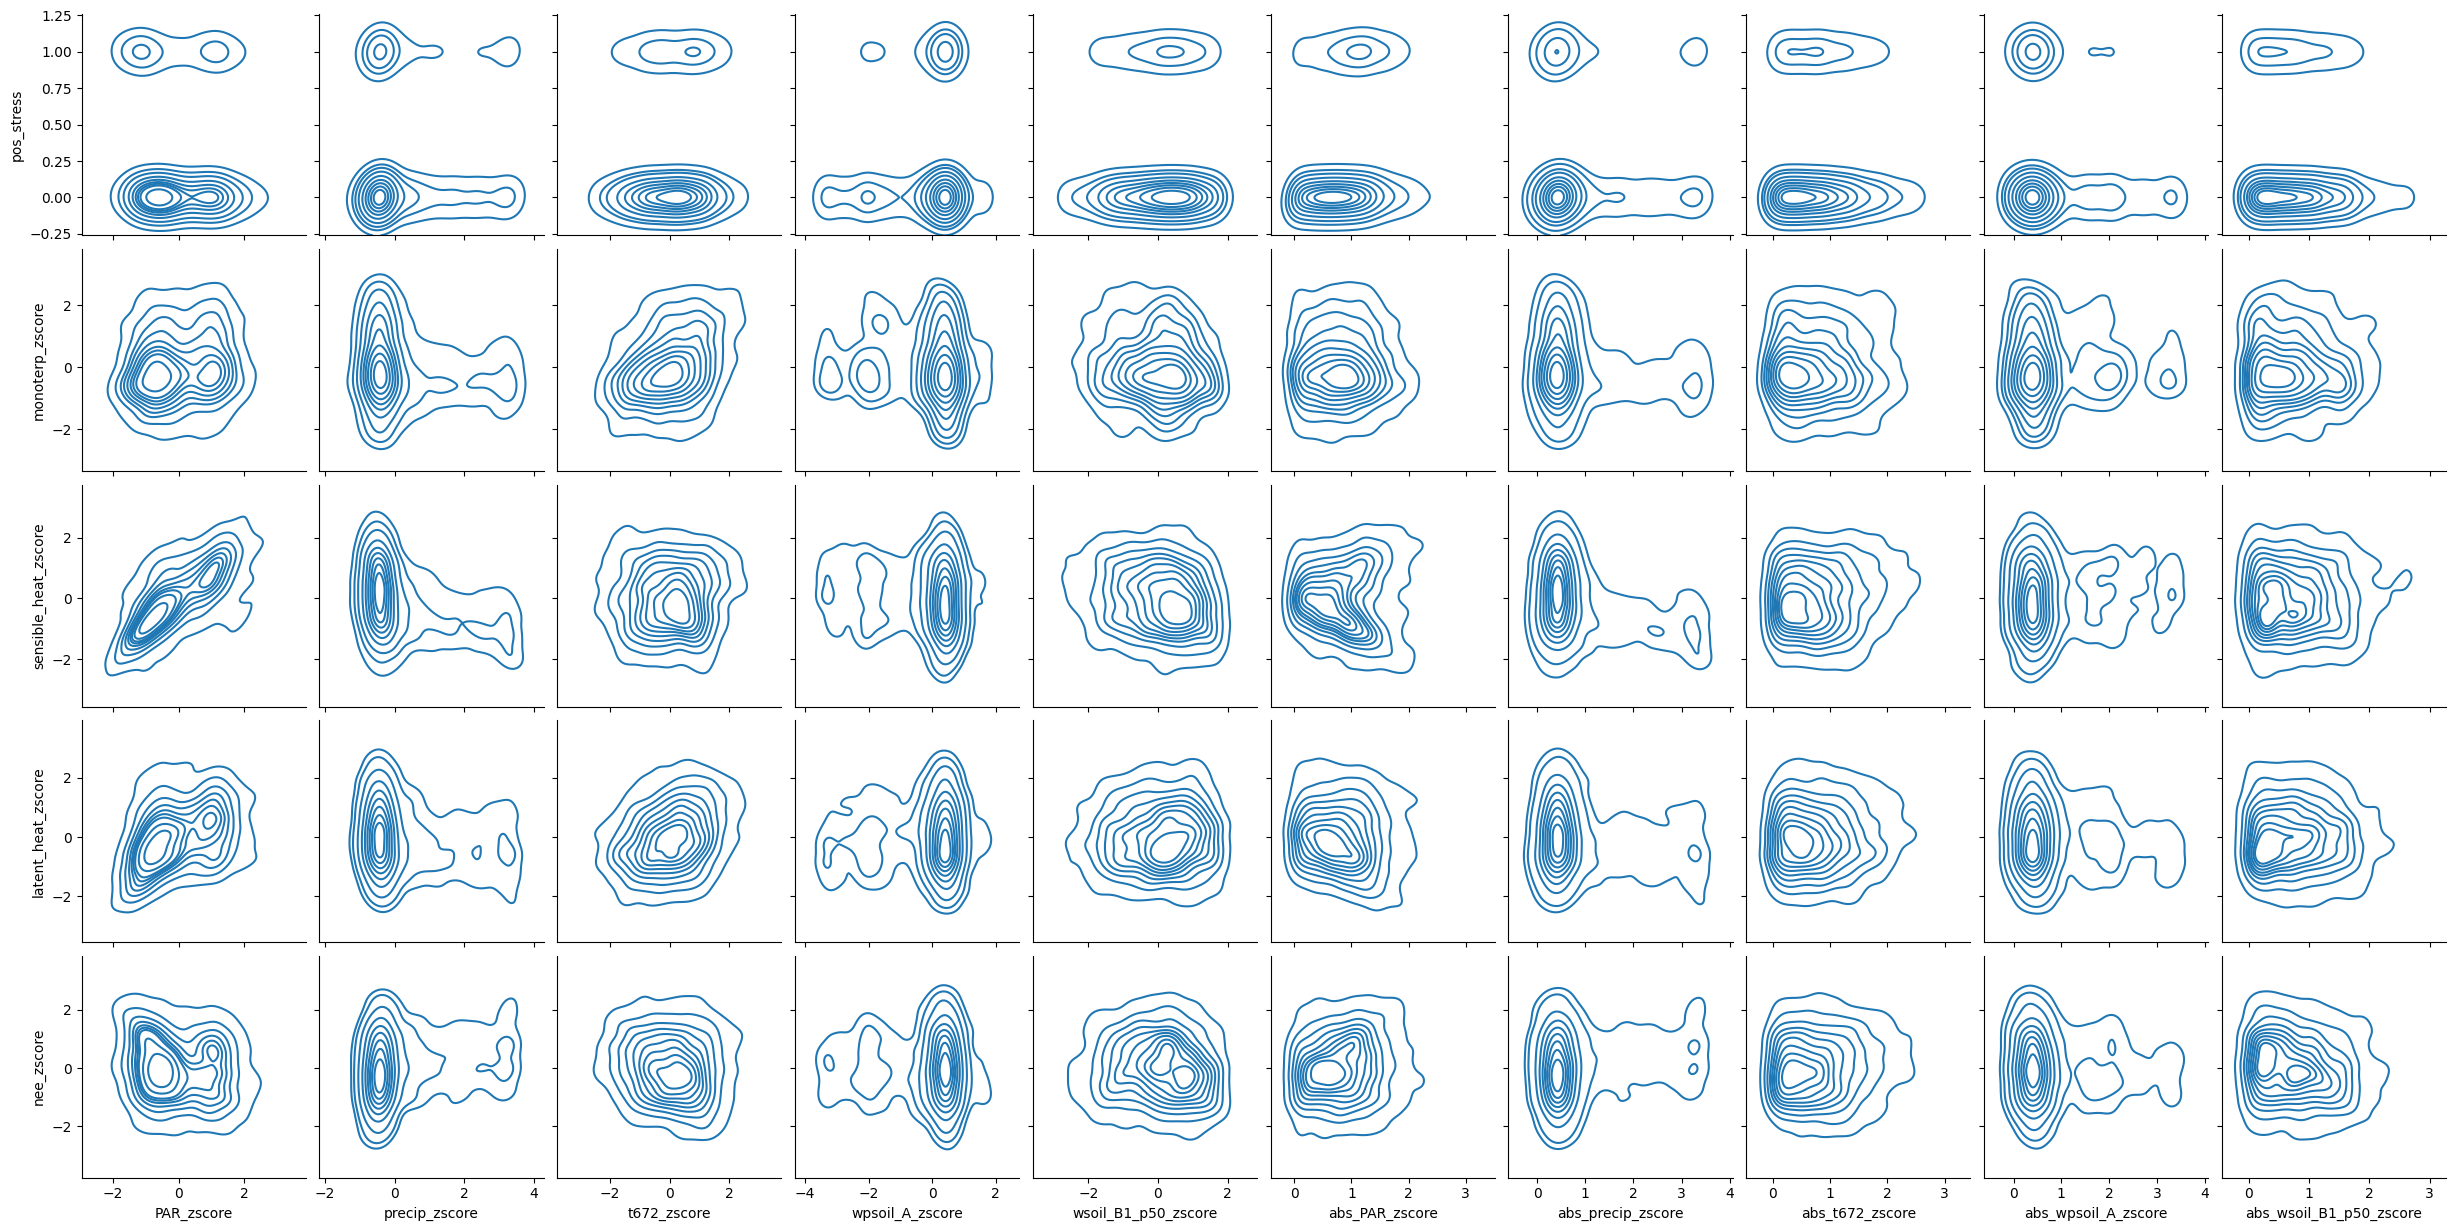

In [25]:
import seaborn as sns
from scipy.stats import zscore
x_vars=['PAR_zscore','precip_zscore','t672_zscore','wpsoil_A_zscore','wsoil_B1_p50_zscore']
for col in x_vars:
    abs_col='abs_'+col
    daily_df_med[abs_col]=daily_df_med[col].abs()

print(daily_df_med['pos_stress'].corr(daily_df_med['PAR_outlier']))
print(daily_df_med['pos_stress'].corr(daily_df_med['PAR_zscore'].abs()))

print(daily_df_med['pos_stress'].corr(daily_df_med['precip_outlier']))
print(daily_df_med['pos_stress'].corr(daily_df_med['precip_zscore'].abs()))

print(daily_df_med['pos_stress'].corr(daily_df_med['t672_outlier']))
print(daily_df_med['pos_stress'].corr(daily_df_med['t672_zscore'].abs()))

print(daily_df_med['pos_stress'].corr(daily_df_med['wpsoil_A_outlier']))
print(daily_df_med['pos_stress'].corr(daily_df_med['wpsoil_A_zscore'].abs()))

print(daily_df_med['pos_stress'].corr(daily_df_med['wsoil_B1_p50_outlier']))
print(daily_df_med['pos_stress'].corr(daily_df_med['wsoil_B1_p50_zscore'].abs()))

sns.pairplot(daily_df_med,kind='kde',y_vars=['pos_stress','monoterp_zscore','sensible_heat_zscore','latent_heat_zscore','nee_zscore'],x_vars=['PAR_zscore','precip_zscore','t672_zscore','wpsoil_A_zscore','wsoil_B1_p50_zscore','abs_PAR_zscore','abs_precip_zscore','abs_t672_zscore','abs_wpsoil_A_zscore','abs_wsoil_B1_p50_zscore'])




In [26]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
df_reg=daily_df_med.dropna()
linreg.fit(df_reg[['abs_PAR_zscore','abs_precip_zscore','abs_t672_zscore','abs_wpsoil_A_zscore','abs_wsoil_B1_p50_zscore']],df_reg['pos_stress'])
linreg.score(df_reg[['abs_PAR_zscore','abs_precip_zscore','abs_t672_zscore','abs_wpsoil_A_zscore','abs_wsoil_B1_p50_zscore']],df_reg['pos_stress'])

0.05320620890486372

<Axes: >

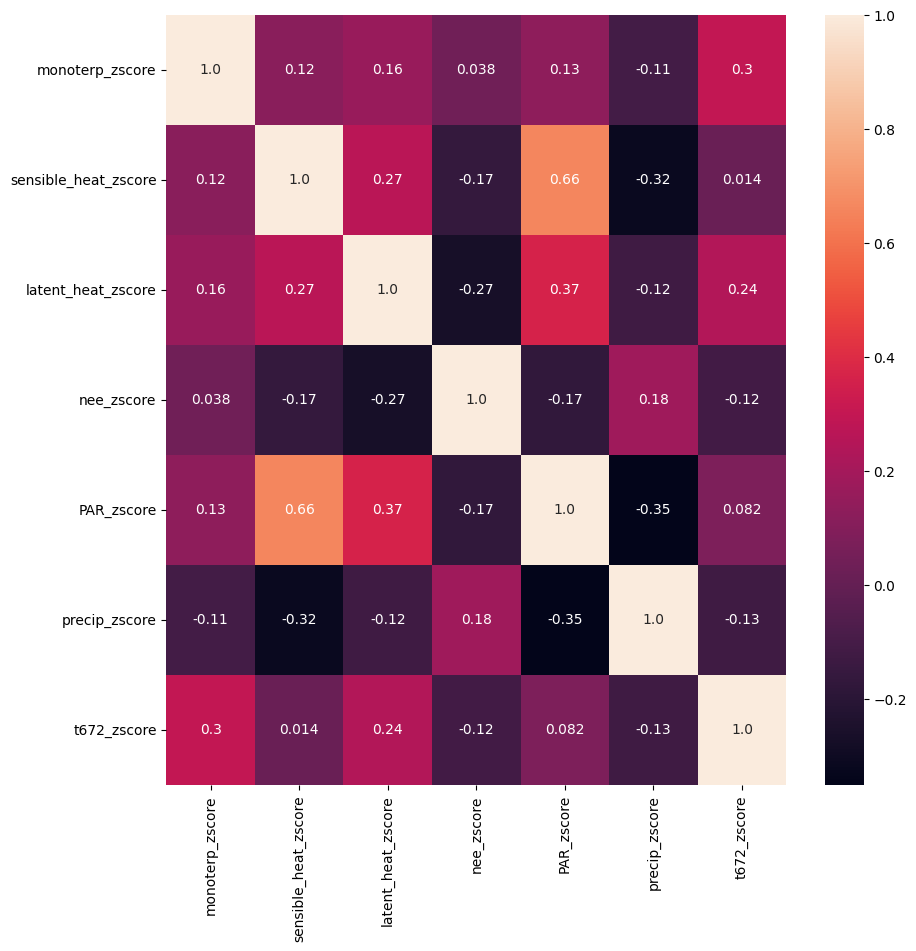

In [27]:

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(daily_df_med.iloc[:,1:8].corr(),annot=True,fmt=".2")